# Task 2 - User Engagement Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset Telco

In [2]:
data=pd.read_csv("telcom_data.csv")
data

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

              xdr          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...        1.585461e+07        2.501332e+06   
1                     L77566A  ...        2.024740e+07        1.911173e+07   
2                     D42335A  ...        1.972566e+07        1.469958e+07   
3                     T21824A  ...        2.138812e+07        1.514664e+07   
4                     D88865A  ...        1.525938e+07        1.896287e+07   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...        1.619167e+07        1.176343e+07   
149997                D10223C  ...        1.387723e+07        8.288284e+06   
149998                T51102A  ...        2.266051e+07        1.855903e+06   
149999                L88342B  ...        8.817106e+06        8.305402e+06   
150000                    NaN  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.735033e+06      7.121804e+08

In [3]:
data.shape

(150001, 55)

In [4]:
pd.set_option('display.max_columns', 55)
data.head(100)

Bearer Id            Start  Start ms              End  End ms  \
0   1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1   1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2   1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3   1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4   1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
..           ...              ...       ...              ...     ...   
95  1.311448e+19   4/22/2019 7:38     804.0   4/25/2019 0:01   199.0   
96  1.311448e+19   4/22/2019 7:54     676.0   4/25/2019 0:01   176.0   
97  7.349883e+18   4/22/2019 8:00     810.0   4/25/2019 2:22   294.0   
98  1.311448e+19   4/22/2019 8:15     473.0   4/25/2019 2:55   731.0   
99  7.349883e+18   4/22/2019 8:19     899.0   4/25/2019 3:17   135.0   

          xdr          IMSI  MSISDN/Number          IMEI  \
0   1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
..        ...           ...            ...           ...   
95   231780.0  2.082017e+14   3.361513e+10  3.520031e+13   
96   230839.0  2.082014e+14   3.366495e+10  8.636750e+13   
97   238915.0  2.082010e+14   3.366403e+10  3.586111e+13   
98   239954.0  2.082010e+14   3.366875e+10  3.533251e+13   
99   241108.0  2.082099e+14   3.376173e+10  3.572851e+13   

       Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   9.16456699548519E+015             42.0              5.0   
1                 L77566A             65.0              5.0   
2                 D42335A              NaN              NaN   
3                 T21824A              NaN              NaN   
4                 D88865A              NaN              NaN   
..                    ...              ...              ...   
95                L73684B              NaN              NaN   
96                D73608B             39.0              2.0   
97                D73605A             38.0              1.0   
98                L76864A              NaN              NaN   
99                T18347B             29.0              0.0   

    Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                      23.0                     44.0   
1                      16.0                     26.0   
2                       6.0                      9.0   
3                      44.0                     44.0   
4                       6.0                      9.0   
..                      ...                      ...   
95                     23.0                     51.0   
96                     22.0                     46.0   
97                     49.0                     47.0   
98                     22.0                     53.0   
99                     44.0                     44.0   

    TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   
..                          ...                          ...   
95                          NaN                          NaN   
96                          NaN                          NaN   
97                          NaN                          NaN   
98                          NaN                          NaN   
99                          NaN                          NaN   

    DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                 100.0                             0.0   
1                 100.0                             0.0   
2                 100.0                      

In [5]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'xdr', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms)', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       '

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   xdr                                       150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
data.isnull().sum().sum()

1031392

# Handle missing values

In [8]:
data.fillna(data.mean(), inplace=True)

In [9]:
data.isnull().sum().sum()

2299

### Neew DataFrame

In [10]:
df={"Bearer Id":data["Bearer Id"],'MSISDN/Number':data['MSISDN/Number'],'Start ms':data['Start ms'],'End ms':data['End ms'],'Dur. (ms)':data['Dur. (ms)'],
   'Dur. (ms)':data['Dur. (ms)'],'Avg RTT DL (ms)':data['Avg RTT DL (ms)'],'Avg RTT UL (ms)':data['Avg RTT UL (ms)'],
   'Activity Duration DL (ms)':data['Activity Duration DL (ms)'],
   'Activity Duration UL (ms)':data['Activity Duration UL (ms)'],}

In [11]:
d=pd.DataFrame(df)
d

Bearer Id  MSISDN/Number  Start ms     End ms     Dur. (ms)  \
0       1.311448e+19   3.366496e+10  770.0000  662.00000  1.823653e+09   
1       1.311448e+19   3.368185e+10  235.0000  606.00000  1.365104e+09   
2       1.311448e+19   3.376063e+10    1.0000  652.00000  1.361763e+09   
3       1.311448e+19   3.375034e+10  486.0000  171.00000  1.321510e+09   
4       1.311448e+19   3.369980e+10  565.0000  954.00000  1.089009e+09   
...              ...            ...       ...        ...           ...   
149996  7.277826e+18   3.365069e+10  451.0000  214.00000  8.123076e+07   
149997  7.349883e+18   3.366345e+10  483.0000  187.00000  9.797070e+07   
149998  1.311448e+19   3.362189e+10  283.0000  810.00000  9.824953e+07   
149999  1.311448e+19   3.361962e+10  696.0000  327.00000  9.791063e+07   
150000  1.013887e+19   4.188282e+10  499.1882  498.80088  1.046091e+08   

        Avg RTT DL (ms)  Avg RTT UL (ms)  Activity Duration DL (ms)  \
0             42.000000         5.000000               3.762400e+04   
1             65.000000         5.000000               1.680000e+02   
2            109.795706        17.662883               0.000000e+00   
3            109.795706        17.662883               3.330000e+03   
4            109.795706        17.662883               0.000000e+00   
...                 ...              ...                        ...   
149996        32.000000         0.000000               4.237600e+04   
149997        27.000000         2.000000               1.726400e+04   
149998        43.000000         6.000000               2.500300e+04   
149999        37.000000         5.000000               1.340500e+04   
150000       109.795706        17.662883               1.829177e+06   

        Activity Duration UL (ms)  
0                    3.878700e+04  
1                    3.560000e+03  
2                    0.000000e+00  
3                    3.788200e+04  
4                    0.000000e+00  
...                           ...  
149996               4.191500e+04  
149997               1.675900e+04  
149998               2.864000e+04  
149999               3.408800e+04  
150000               1.408880e+06  

[150001 rows x 9 columns]

In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer Id                  150001 non-null  float64
 1   MSISDN/Number              150001 non-null  float64
 2   Start ms                   150001 non-null  float64
 3   End ms                     150001 non-null  float64
 4   Dur. (ms)                  150001 non-null  float64
 5   Avg RTT DL (ms)            150001 non-null  float64
 6   Avg RTT UL (ms)            150001 non-null  float64
 7   Activity Duration DL (ms)  150001 non-null  float64
 8   Activity Duration UL (ms)  150001 non-null  float64
dtypes: float64(9)
memory usage: 10.3 MB


# Sessions Frequency

### In the context of network data or telecommunications, session frequency typically refers to the number of sessions or connections established by a specific user or device

In [13]:
session_frequency = data.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [14]:
len(session_frequency)

150001

# As the session frequency increases the count decreases that means count of session frquency is low

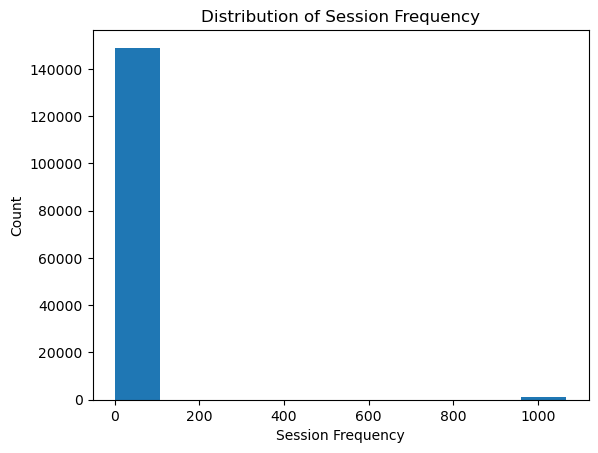

In [15]:
session_frequency.plot(kind='hist', bins=10)

plt.xlabel('Session Frequency')
plt.ylabel('Count')
plt.title('Distribution of Session Frequency')
plt.show()

# Create a distribution plot using distplot

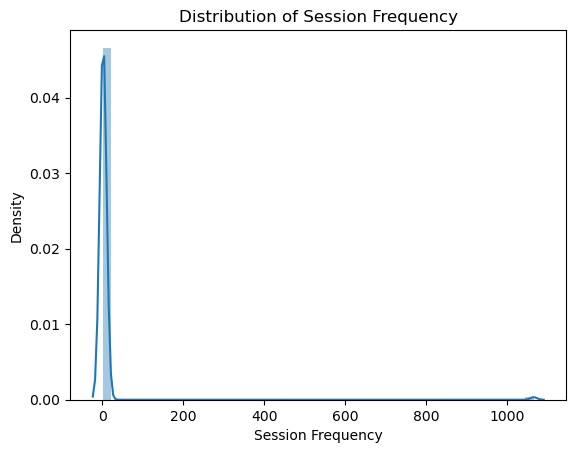

In [16]:
sns.distplot(session_frequency, kde=True)

plt.xlabel('Session Frequency')
plt.ylabel('Density')
plt.title('Distribution of Session Frequency')

plt.show()

# Session frquency based on hanset type and Manufacturer

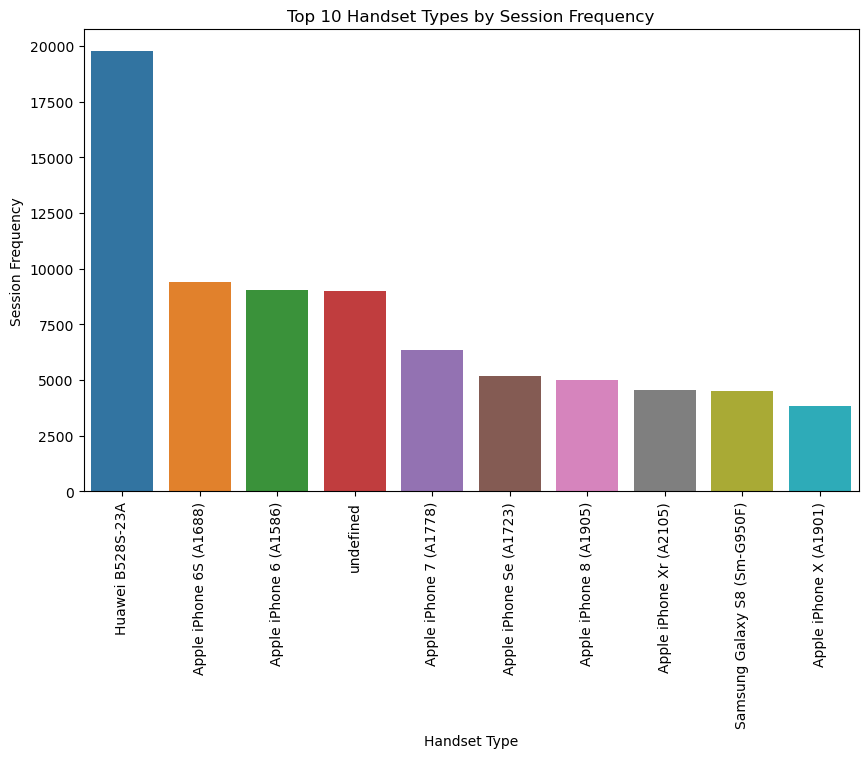

In [17]:
# Group the data by 'Handset Type' and 'MSISDN/Number' and count the number of unique sessions
session_f = data.groupby(['Handset Type', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_f.rename(columns={'Dur. (ms)': 'Session F'}, inplace=True)

# Group the data by 'Handset Type' and calculate the total session frequency
type_frequency = session_f.groupby('Handset Type')['Session F'].sum().reset_index()

# Sort the data by session frequency in descending order
type_frequency = type_frequency.sort_values('Session F', ascending=False).head(10)

# Plot the session frequency by handset type
plt.figure(figsize=(10, 6))
sns.barplot(data=type_frequency, x='Handset Type', y='Session F')
plt.xlabel('Handset Type')
plt.ylabel('Session Frequency')
plt.title('Top 10 Handset Types by Session Frequency')
plt.xticks(rotation=90)
plt.show()

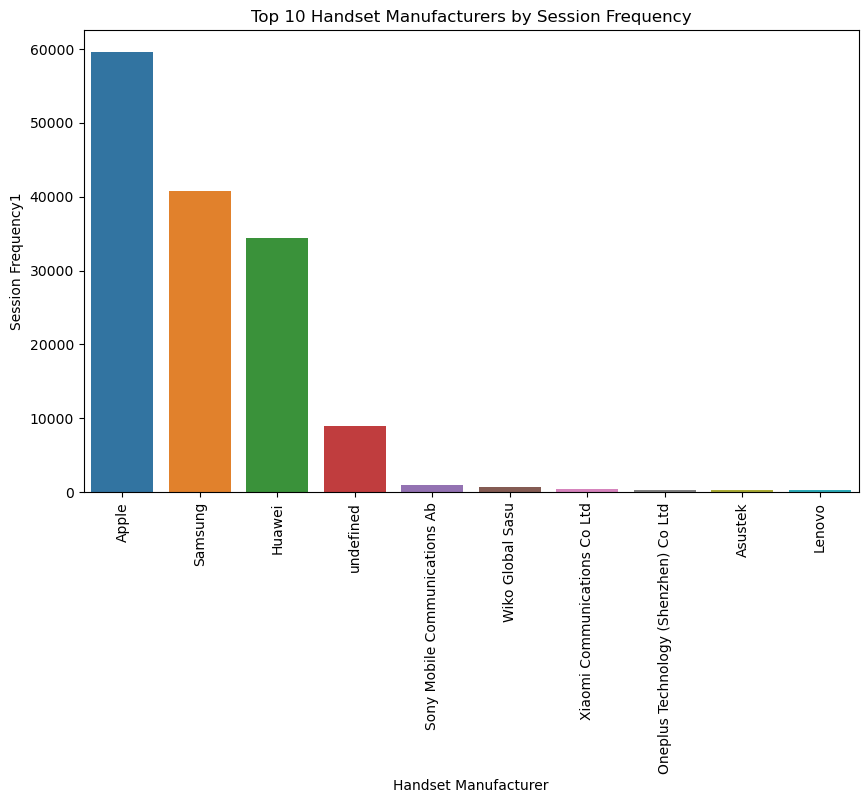

In [18]:
# Group the data by 'Handset Manufacturer' and 'MSISDN/Number' and count the number of unique sessions
session_frequency1 = data.groupby(['Handset Manufacturer', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_frequency1.rename(columns={'Dur. (ms)': 'Session Frequency1'}, inplace=True)

# Group the data by 'Handset Manufacturer' and calculate the total session frequency
manufacturer_frequency = session_frequency1.groupby('Handset Manufacturer')['Session Frequency1'].sum().reset_index()

# Sort the data by session frequency in descending order
manufacturer_frequency = manufacturer_frequency.sort_values('Session Frequency1', ascending=False).head(10)

# Plot the session frequency by handset manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(data=manufacturer_frequency, x='Handset Manufacturer', y='Session Frequency1')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Session Frequency1')
plt.title('Top 10 Handset Manufacturers by Session Frequency')
plt.xticks(rotation=90)
plt.show()

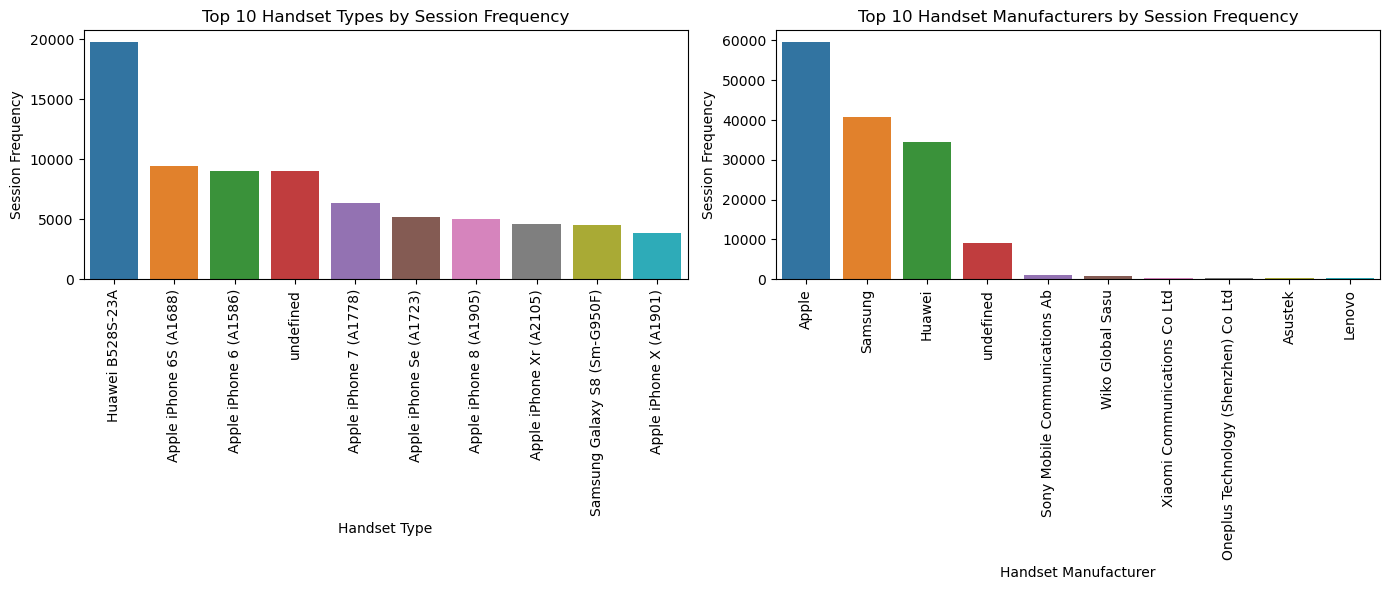

In [19]:
# Group the data by 'Handset Type' and 'MSISDN/Number' and count the number of unique sessions
session_frequency_type = data.groupby(['Handset Type', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_frequency_type.rename(columns={'Dur. (ms)': 'Session F'}, inplace=True)

# Group the data by 'Handset Type' and calculate the total session frequency
type_frequency = session_frequency_type.groupby('Handset Type')['Session F'].sum().reset_index()

# Sort the data by session frequency in descending order
type_frequency = type_frequency.sort_values('Session F', ascending=False).head(10)

# Group the data by 'Handset Manufacturer' and 'MSISDN/Number' and count the number of unique sessions
session_frequency_manufacturer = data.groupby(['Handset Manufacturer', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_frequency_manufacturer.rename(columns={'Dur. (ms)': 'Session F'}, inplace=True)

# Group the data by 'Handset Manufacturer' and calculate the total session frequency
manufacturer_frequency = session_frequency_manufacturer.groupby('Handset Manufacturer')['Session F'].sum().reset_index()

# Sort the data by session frequency in descending order
manufacturer_frequency = manufacturer_frequency.sort_values('Session F', ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot session frequency by handset type
sns.barplot(data=type_frequency, x='Handset Type', y='Session F', ax=axes[0])
axes[0].set_xlabel('Handset Type')
axes[0].set_ylabel('Session Frequency')
axes[0].set_title('Top 10 Handset Types by Session Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Plot session frequency by handset manufacturer
sns.barplot(data=manufacturer_frequency, x='Handset Manufacturer', y='Session F', ax=axes[1])
axes[1].set_xlabel('Handset Manufacturer')
axes[1].set_ylabel('Session Frequency')
axes[1].set_title('Top 10 Handset Manufacturers by Session Frequency')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

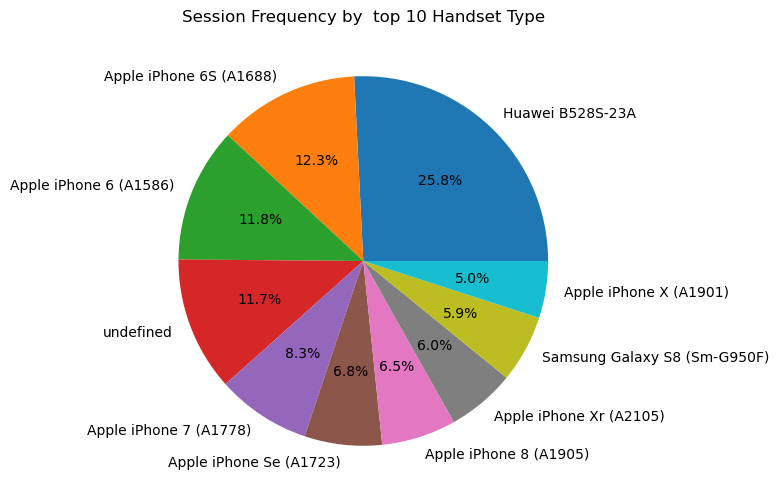

In [20]:
# Plotting a pie chart for session frequency by handset type
plt.figure(figsize=(8, 6))
plt.pie(type_frequency['Session F'], labels=type_frequency['Handset Type'], autopct='%1.1f%%')
plt.title('Session Frequency by  top 10 Handset Type')
plt.show()

# The duration of the session Session Duration 

In [21]:
# Calculate session duration by subtracting "End ms" from "Start ms"
Session_Duration = data['Dur. (ms)']




print(Session_Duration)

0         1.823653e+09
1         1.365104e+09
2         1.361763e+09
3         1.321510e+09
4         1.089009e+09
              ...     
149996    8.123076e+07
149997    9.797070e+07
149998    9.824953e+07
149999    9.791063e+07
150000    1.046091e+08
Name: Dur. (ms), Length: 150001, dtype: float64


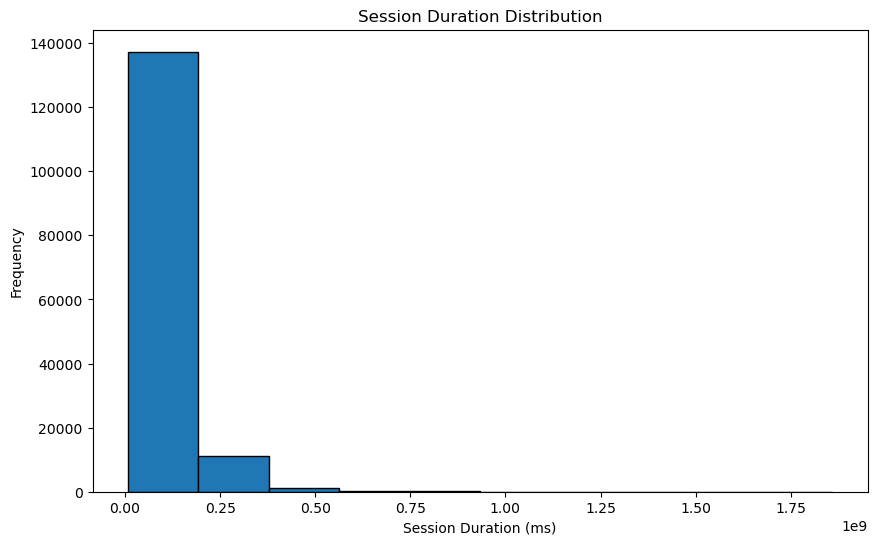

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(Session_Duration, bins=10, edgecolor='black')
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# As the count increases the duration deacreses

In [23]:
d.describe()

Bearer Id  MSISDN/Number       Start ms         End ms  \
count  1.500010e+05   1.500010e+05  150001.000000  150001.000000   
mean   1.013887e+19   4.188282e+10     499.188200     498.800880   
std    2.883600e+18   2.438731e+12     288.610872     288.096693   
min    6.917538e+18   3.360100e+10       0.000000       0.000000   
25%    7.349883e+18   3.365151e+10     250.000000     251.000000   
50%    7.349883e+18   3.366380e+10     499.000000     500.000000   
75%    1.304243e+19   3.368473e+10     749.000000     750.000000   
max    1.318654e+19   8.823971e+14     999.000000     999.000000   

          Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count  1.500010e+05    150001.000000    150001.000000   
mean   1.046091e+08       109.795706        17.662883   
std    8.103734e+07       559.342620        76.529933   
min    7.142988e+06         0.000000         0.000000   
25%    5.744206e+07        35.000000         3.000000   
50%    8.639998e+07        54.000000         7.000000   
75%    1.324307e+08       109.795706        17.662883   
max    1.859336e+09     96923.000000      7120.000000   

       Activity Duration DL (ms)  Activity Duration UL (ms)  
count               1.500010e+05               1.500010e+05  
mean                1.829177e+06               1.408880e+06  
std                 5.696376e+06               4.643215e+06  
min                 0.000000e+00               0.000000e+00  
25%                 1.487800e+04               2.154000e+04  
50%                 3.930500e+04               4.679400e+04  
75%                 6.796110e+05               5.991140e+05  
max                 1.365365e+08               1.449113e+08

# The session total traffic


## It calculates the total number of pages visited on a website in a single go.

### adding the values of 'Total DL (Bytes)' and 'Total UL (Bytes)' columns and stores the result in a new column called 'Session_Total_Traffic'.

In [24]:
total_traffic = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

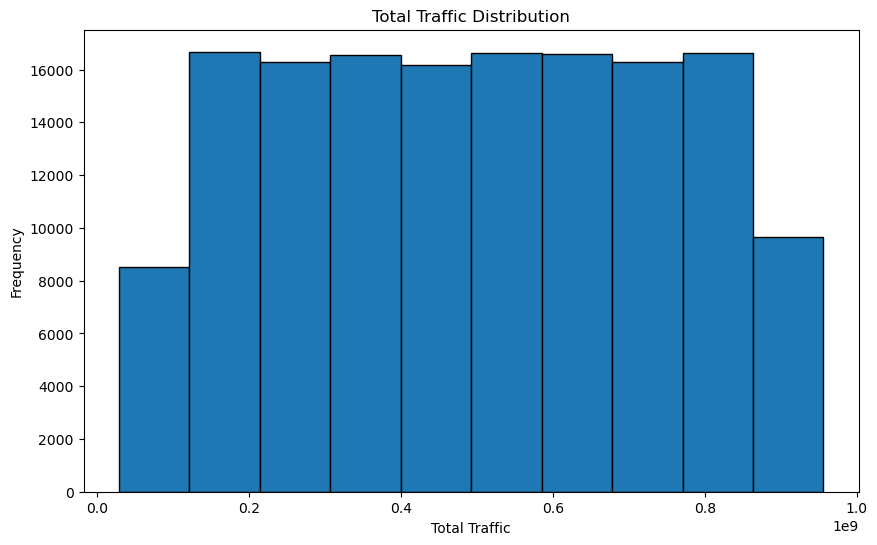

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(total_traffic, bins=10, edgecolor='black')
plt.title('Total Traffic Distribution')
plt.xlabel('Total Traffic')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_traffic

0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957646e+08
Length: 150001, dtype: float64

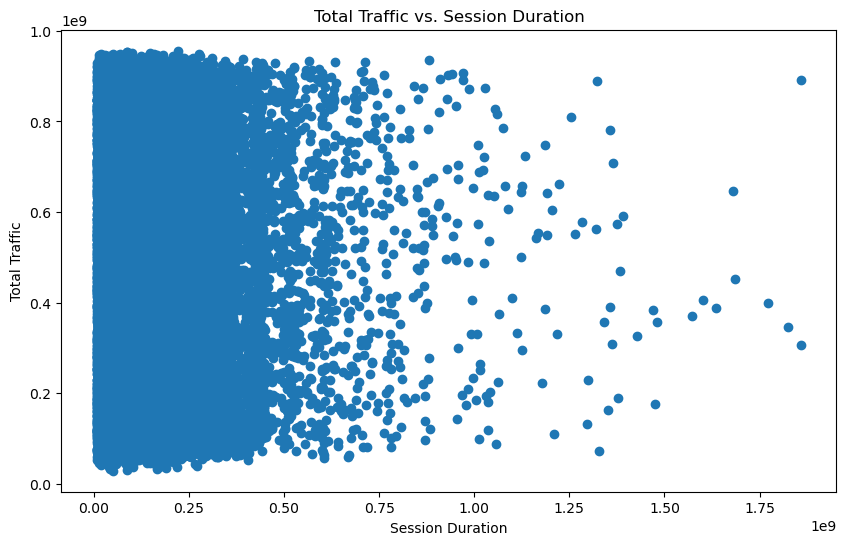

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(Session_Duration, total_traffic)
plt.title('Total Traffic vs. Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Total Traffic')
plt.show()

In [29]:
d.columns

Index(['Bearer Id', 'MSISDN/Number', 'Start ms', 'End ms', 'Dur. (ms)',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)'],
      dtype='object')

In [30]:
b={'MSISDN/Number':data['MSISDN/Number'],"session_frequency":session_frequency,"session_duration":Session_Duration,'total_traffic':total_traffic}

In [31]:
c=pd.DataFrame(b)
c

MSISDN/Number  session_frequency  session_duration  total_traffic
0        3.366496e+10                  2      1.823653e+09   3.456294e+08
1        3.368185e+10                  2      1.365104e+09   7.071854e+08
2        3.376063e+10                  1      1.361763e+09   3.076910e+08
3        3.375034e+10                  1      1.321510e+09   8.893527e+08
4        3.369980e+10                  1      1.089009e+09   6.076814e+08
...               ...                ...               ...            ...
149996   3.365069e+10                  1      8.123076e+07   6.318041e+08
149997   3.366345e+10                  2      9.797070e+07   7.057839e+08
149998   3.362189e+10                  1      9.824953e+07   6.276986e+08
149999   3.361962e+10                  1      9.791063e+07   4.015220e+08
150000   4.188282e+10               1066      1.046091e+08   4.957646e+08

[150001 rows x 4 columns]

In [32]:

for i in c.columns:
   
    # check if the datatype is object or not
    if c[i].dtypes == "object":
        
        mode_value = c[i].mode()[0]
        c[i].fillna(mode_value, inplace = True)
    elif c[i].dtypes != "object":
        mean_value = c[i].mean()
        c[i].fillna(mean_value, inplace = True)

In [33]:
dframe=pd.concat([c,data],axis=0)

# Task 2.1

####  Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [34]:
# Aggregate the metrics per customer ID
aggregated_data = dframe.groupby('MSISDN/Number').agg({
    'session_frequency': 'mean',
    'session_duration': 'sum',
    'total_traffic': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

# Report the top 10 customers per engagement metric
top_10_frequency = aggregated_data.nlargest(10, 'session_frequency')
top_10_duration = aggregated_data.nlargest(10, 'session_duration')
top_10_traffic = aggregated_data.nlargest(10, 'total_traffic')
top_10_social_media = aggregated_data.nlargest(10, 'Social Media DL (Bytes)')
top_10_google = aggregated_data.nlargest(10, 'Google DL (Bytes)')
top_10_email = aggregated_data.nlargest(10, 'Email DL (Bytes)')
top_10_youtube = aggregated_data.nlargest(10, 'Youtube DL (Bytes)')
top_10_netflix = aggregated_data.nlargest(10, 'Netflix DL (Bytes)')
top_10_gaming = aggregated_data.nlargest(10, 'Gaming DL (Bytes)')
top_10_other = aggregated_data.nlargest(10, 'Other DL (Bytes)')


# Print the results
print("Top 10 Customers by Session Frequency:")
print(top_10_frequency)
print("\nTop 10 Customers by Session Duration:")
print(top_10_duration)
print("\nTop 10 Customers by Total Traffic:")
print(top_10_traffic)
print("\nTop 10 Customers by Social Media Usage:")
print(top_10_social_media)
print("\nTop 10 Customers by Google Usage:")
print(top_10_google)
print("\nTop 10 Customers by Email Usage:")
print(top_10_email)
print("\nTop 10 Customers by YouTube Usage:")
print(top_10_youtube)
print("\nTop 10 Customers by Netflix Usage:")
print(top_10_netflix)
print("\nTop 10 Customers by Gaming Usage:")
print(top_10_gaming)
print("\nTop 10 Customers by Other Data Usage:")
print(top_10_other)

Top 10 Customers by Session Frequency:
               session_frequency  session_duration  total_traffic  \
MSISDN/Number                                                       
4.188282e+10              1066.0      7.255155e+10   5.317447e+11   
3.362632e+10                18.0      8.791937e+09   7.971167e+09   
3.361489e+10                17.0      9.966906e+09   8.846226e+09   
3.362578e+10                17.0      1.855376e+10   8.499621e+09   
3.365973e+10                16.0      4.035436e+09   7.705863e+09   
3.367588e+10                15.0      4.865954e+09   7.891111e+09   
3.376054e+10                15.0      9.279442e+09   8.514774e+09   
3.366716e+10                13.0      8.744922e+09   5.618394e+09   
3.360313e+10                12.0      6.287767e+09   4.976195e+09   
3.360452e+10                12.0      5.207995e+09   5.487855e+09   

               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                    

**************************************************
Top 10 categories for session_frequency
1.0     77731
2.0     21452
3.0      4422
4.0      1950
5.0       938
6.0       208
7.0        75
8.0        34
9.0        17
10.0       12
Name: session_frequency, dtype: int64


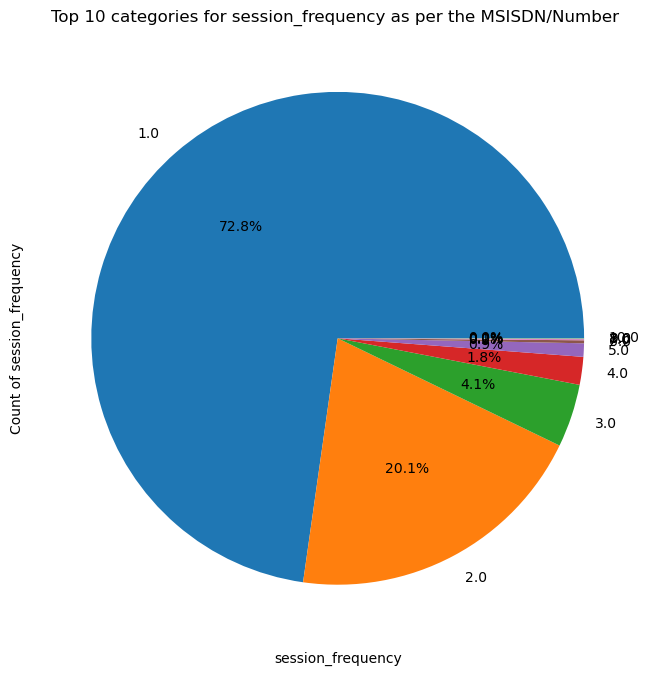

**************************************************
**************************************************
Top 10 categories for session_duration
86399958.0    80
86399957.0    79
86399945.0    78
86399953.0    78
86399928.0    77
86399947.0    77
86399963.0    76
86399965.0    75
86399941.0    75
86399972.0    75
Name: session_duration, dtype: int64


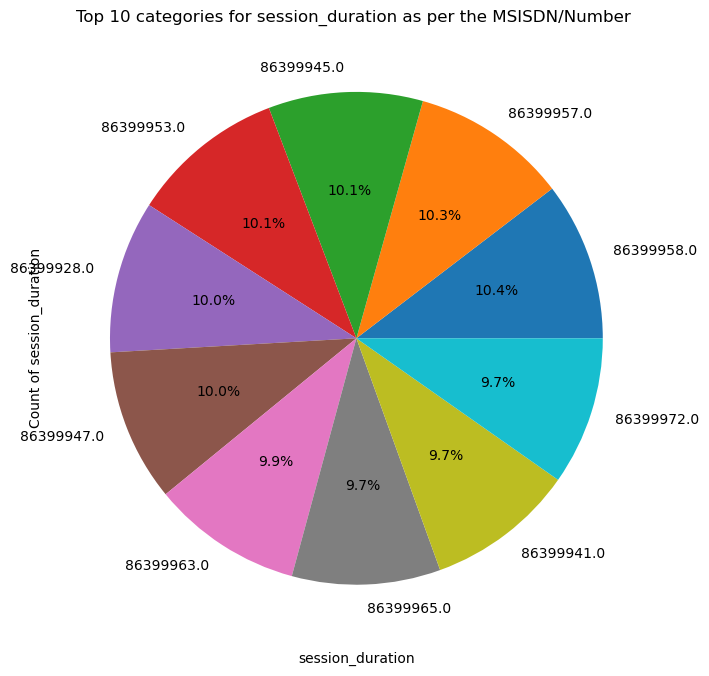

**************************************************
**************************************************
Top 10 categories for total_traffic
477037375.0    2
811996647.0    2
321294586.0    2
375293583.0    2
637726002.0    2
990132189.0    1
599733815.0    1
630092434.0    1
114976036.0    1
732463761.0    1
Name: total_traffic, dtype: int64


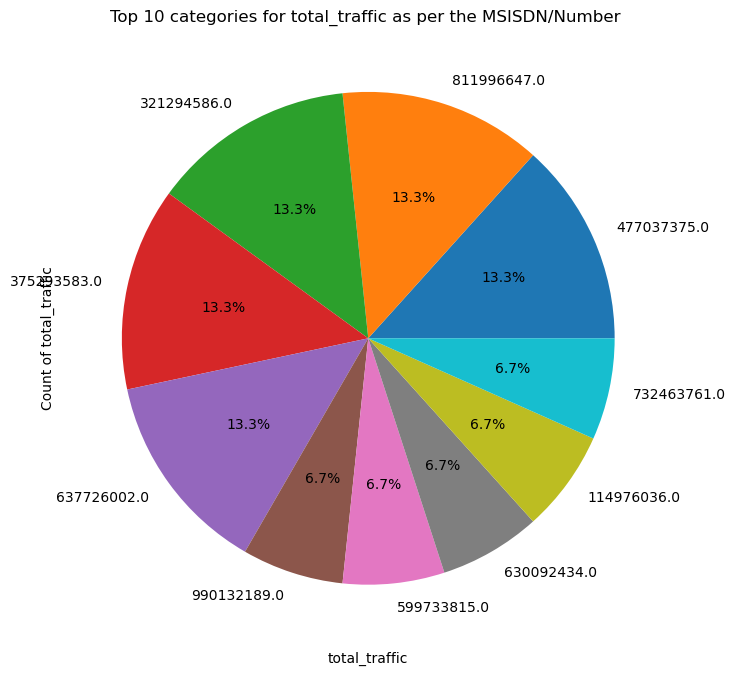

**************************************************
**************************************************
Top 10 categories for Social Media DL (Bytes)
2450530.0    3
1591078.0    3
2586604.0    3
2334058.0    3
3194199.0    3
2159055.0    3
2106903.0    3
2028429.0    3
802637.0     3
3263599.0    3
Name: Social Media DL (Bytes), dtype: int64


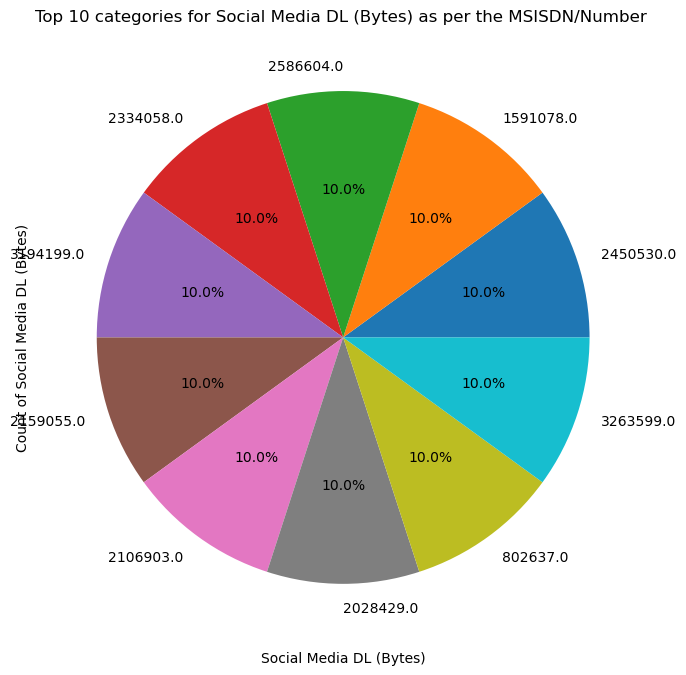

**************************************************
**************************************************
Top 10 categories for Social Media UL (Bytes)
61754.0    9
57952.0    9
22250.0    9
40418.0    8
29179.0    8
60828.0    8
51638.0    8
65459.0    8
53496.0    7
51338.0    7
Name: Social Media UL (Bytes), dtype: int64


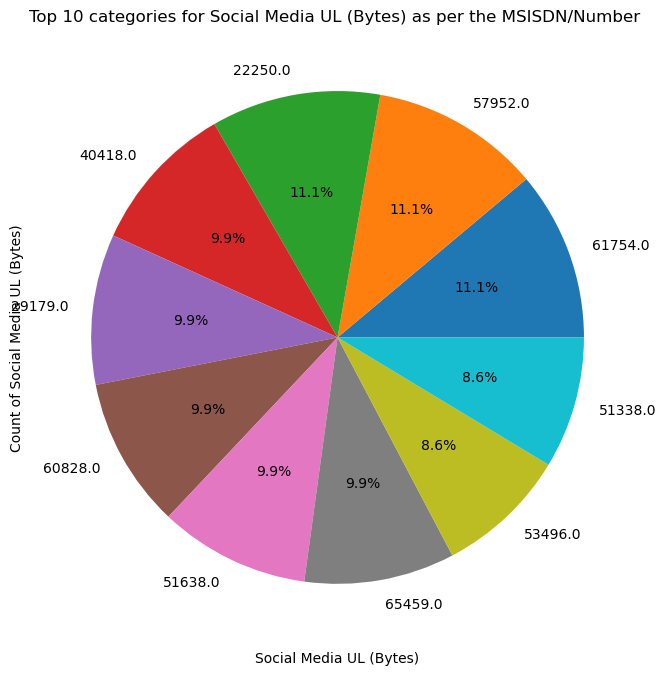

**************************************************
**************************************************
Top 10 categories for Google DL (Bytes)
6839538.0    3
8662757.0    3
128061.0     2
3975587.0    2
7326227.0    2
7614216.0    2
5325995.0    2
6653920.0    2
7040783.0    2
5442830.0    2
Name: Google DL (Bytes), dtype: int64


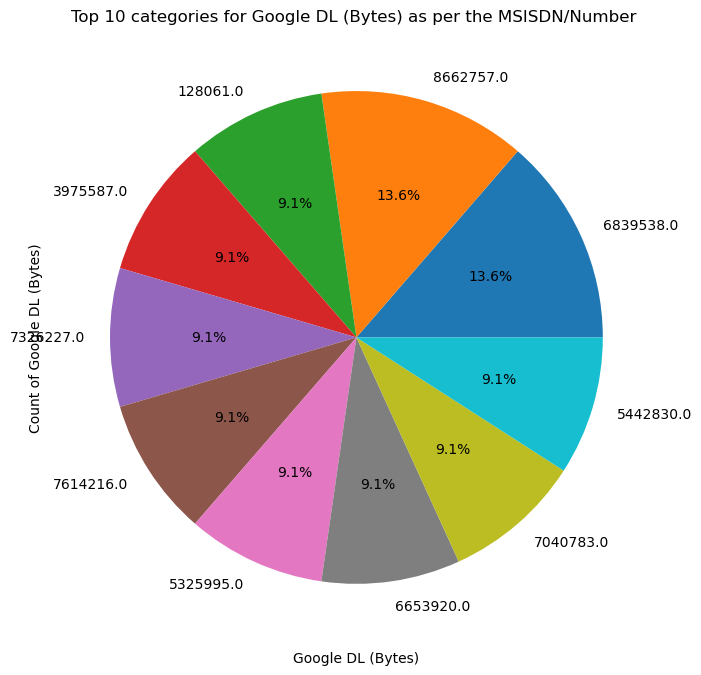

**************************************************
**************************************************
Top 10 categories for Google UL (Bytes)
2560372.0    3
3818169.0    3
2305277.0    3
2856925.0    3
3120933.0    3
350338.0     3
3557768.0    3
716419.0     2
2463948.0    2
1173790.0    2
Name: Google UL (Bytes), dtype: int64


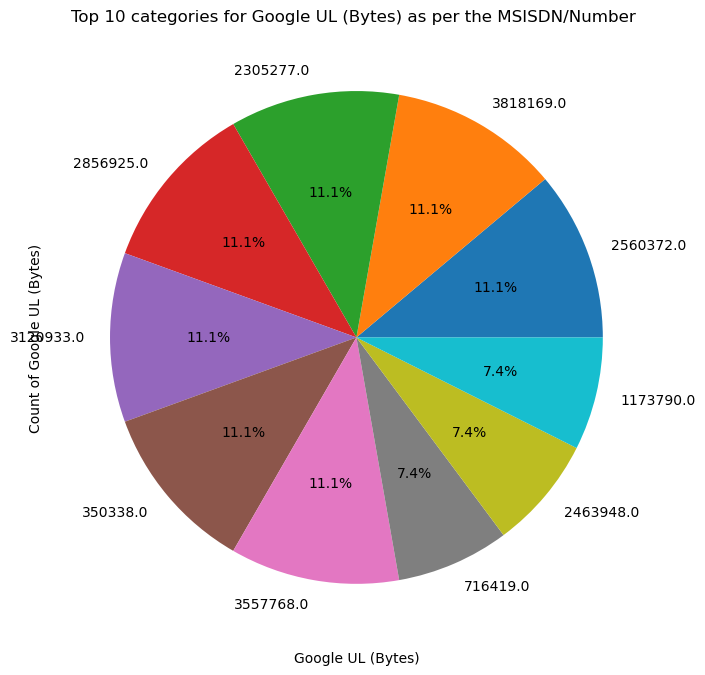

**************************************************
**************************************************
Top 10 categories for Email DL (Bytes)
3177858.0    3
3028657.0    3
2243709.0    3
3536751.0    3
1113690.0    3
2863091.0    3
136430.0     3
1212700.0    3
2144315.0    3
2978829.0    3
Name: Email DL (Bytes), dtype: int64


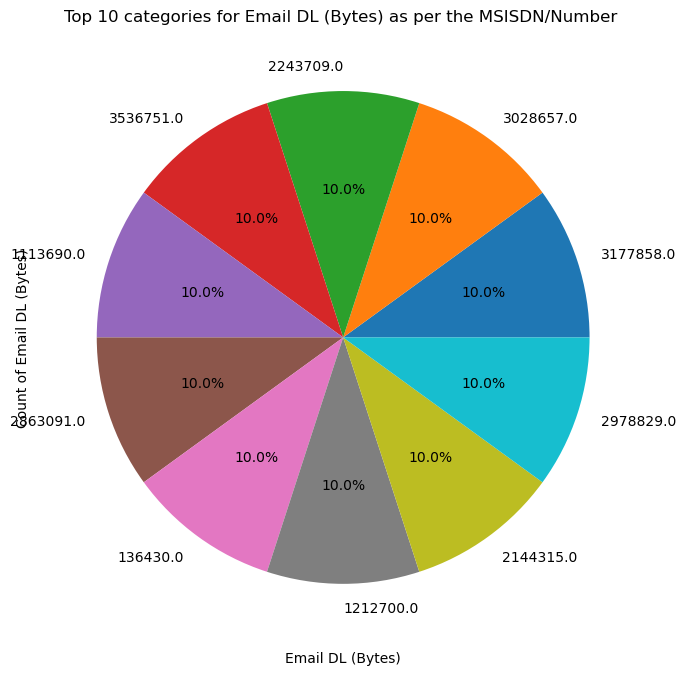

**************************************************
**************************************************
Top 10 categories for Email UL (Bytes)
326774.0    4
63879.0     4
590111.0    4
305354.0    4
893249.0    4
909694.0    4
598230.0    4
505716.0    4
382070.0    3
676010.0    3
Name: Email UL (Bytes), dtype: int64


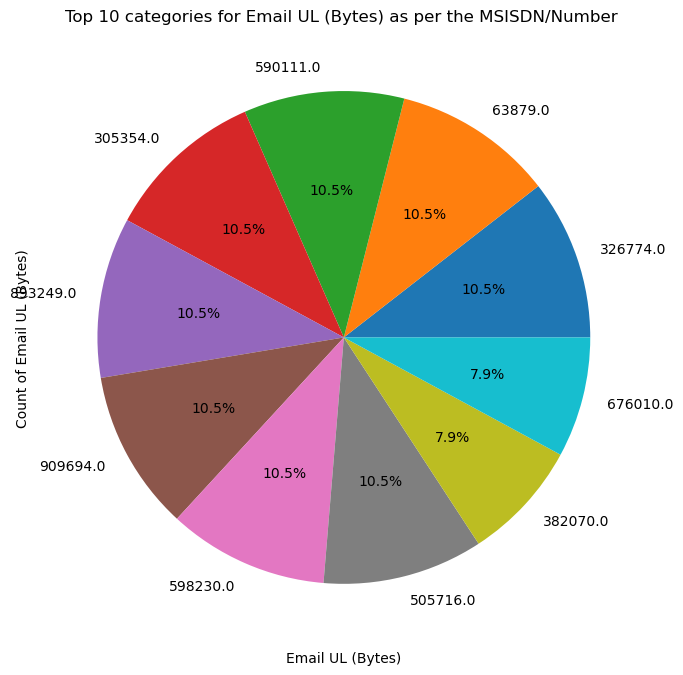

**************************************************
**************************************************
Top 10 categories for Youtube DL (Bytes)
19739158.0    2
3364291.0     2
16900080.0    2
5712949.0     2
12073292.0    2
10633865.0    2
21503895.0    2
13920466.0    2
13426045.0    2
11887559.0    2
Name: Youtube DL (Bytes), dtype: int64


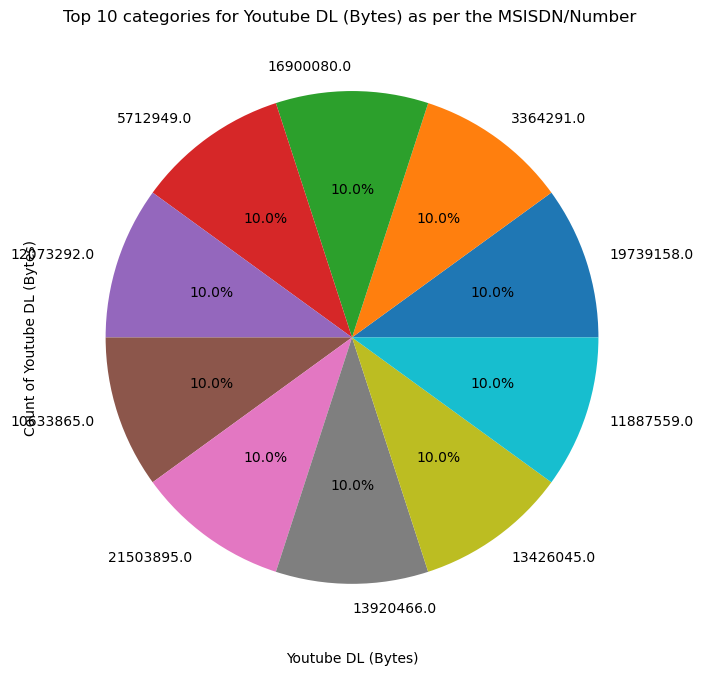

**************************************************
**************************************************
Top 10 categories for Youtube UL (Bytes)
2027396.0     2
25167269.0    2
830962.0      2
4697007.0     2
14360637.0    2
13520710.0    2
212990.0      2
12450119.0    2
5681048.0     2
3650869.0     2
Name: Youtube UL (Bytes), dtype: int64


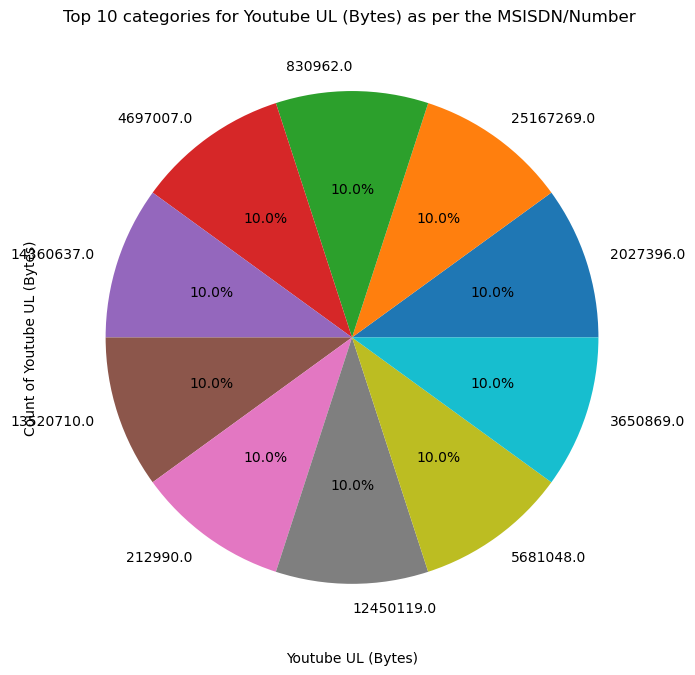

**************************************************
**************************************************
Top 10 categories for Netflix DL (Bytes)
11475034.0    2
2097111.0     2
21048072.0    2
4474859.0     2
15206145.0    2
17260640.0    2
8029884.0     2
660720.0      2
21841249.0    2
6288023.0     2
Name: Netflix DL (Bytes), dtype: int64


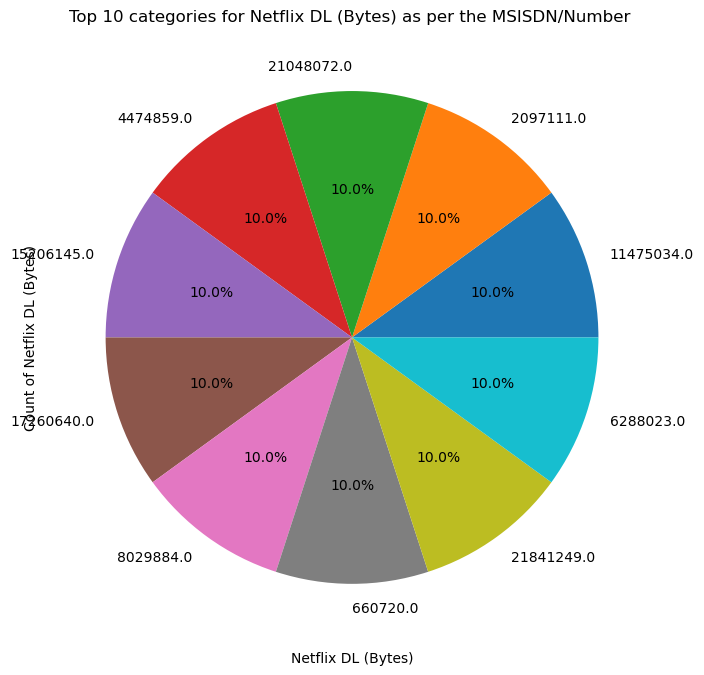

**************************************************
**************************************************
Top 10 categories for Netflix UL (Bytes)
9451822.0     2
20814068.0    2
4462331.0     2
15688382.0    2
20864896.0    2
16801656.0    2
20201855.0    2
10121404.0    2
721657.0      2
13901213.0    2
Name: Netflix UL (Bytes), dtype: int64


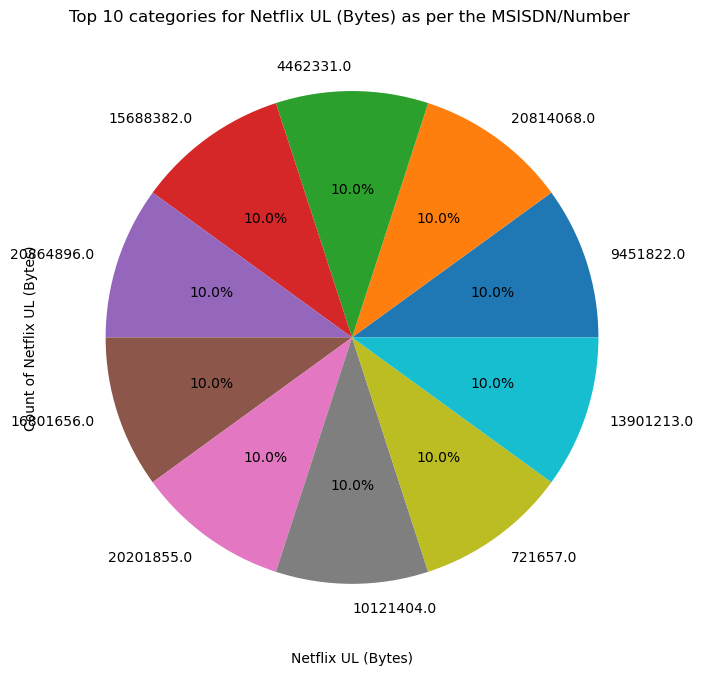

**************************************************
**************************************************
Top 10 categories for Gaming DL (Bytes)
6.862361e+08    2
1.153043e+08    2
1.397145e+08    2
8.236561e+08    2
7.681073e+08    2
6.814473e+08    2
6.384263e+08    2
6.476069e+08    2
3.880748e+08    1
1.308981e+09    1
Name: Gaming DL (Bytes), dtype: int64


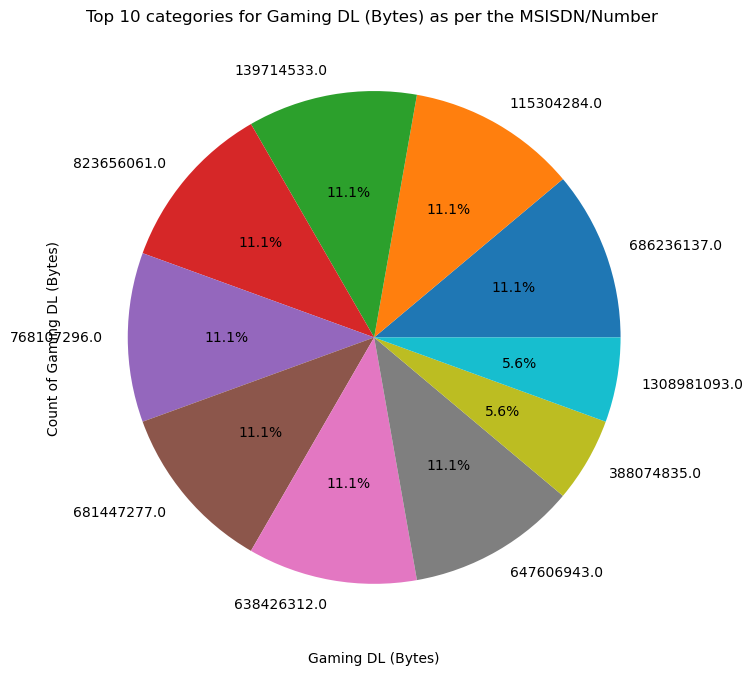

**************************************************
**************************************************
Top 10 categories for Gaming UL (Bytes)
10079814.0    3
13075526.0    2
6141584.0     2
11863263.0    2
14957018.0    2
11308299.0    2
3965941.0     2
16450457.0    2
14365103.0    2
8143373.0     2
Name: Gaming UL (Bytes), dtype: int64


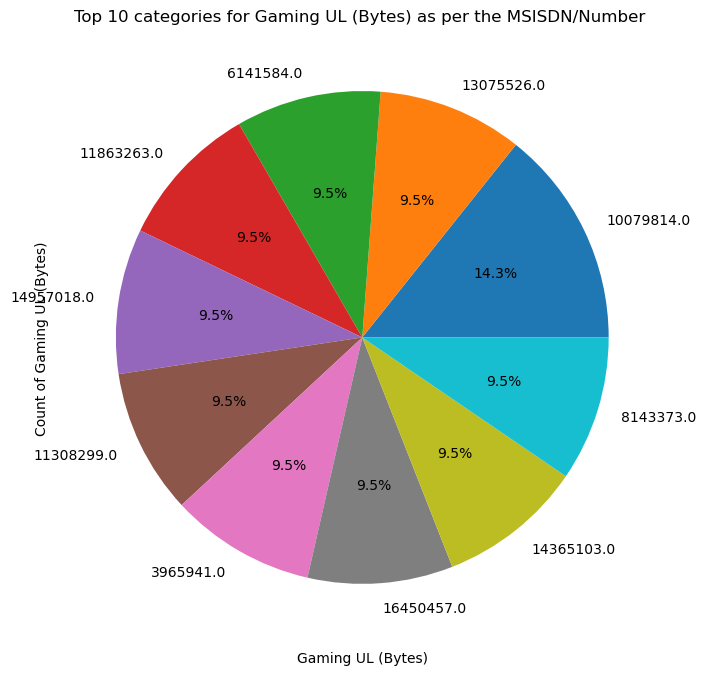

**************************************************
**************************************************
Top 10 categories for Other DL (Bytes)
7.027837e+08    2
3.935565e+08    2
1.085264e+08    2
7.372510e+08    2
1.586779e+08    2
6.261997e+08    2
1.026521e+09    1
4.338359e+08    1
5.950361e+08    1
5.406972e+08    1
Name: Other DL (Bytes), dtype: int64


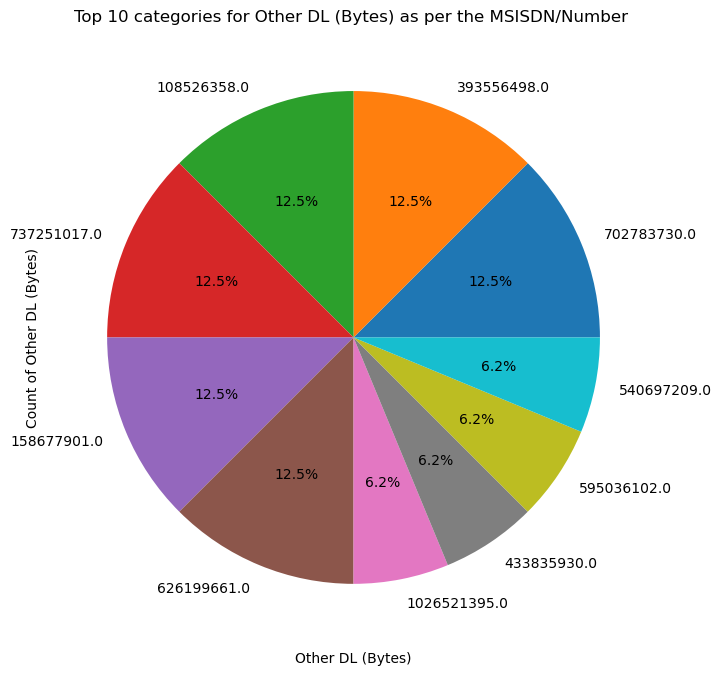

**************************************************
**************************************************
Top 10 categories for Other UL (Bytes)
8125986.0     3
461452.0      2
7607832.0     2
10052324.0    2
9471492.0     2
16037896.0    2
8663589.0     2
8925465.0     2
6213273.0     2
13366223.0    2
Name: Other UL (Bytes), dtype: int64


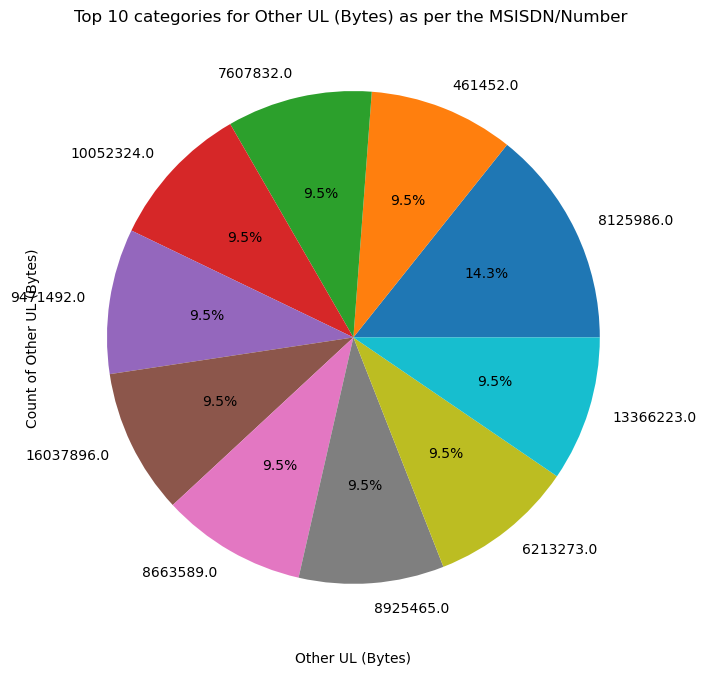

**************************************************


In [35]:
for col in aggregated_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(aggregated_data[col].value_counts().sort_values(ascending = False).head(10))
    index = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).index
    values = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,8])
    plt.pie(values, labels = index,autopct = '%.1f%%')
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {} as per the MSISDN/Number ".format(col))
    plt.grid()
    plt.show();
    print("*"*50)

**************************************************
Top 10 categories for session_frequency
1.0     77731
2.0     21452
3.0      4422
4.0      1950
5.0       938
6.0       208
7.0        75
8.0        34
9.0        17
10.0       12
Name: session_frequency, dtype: int64


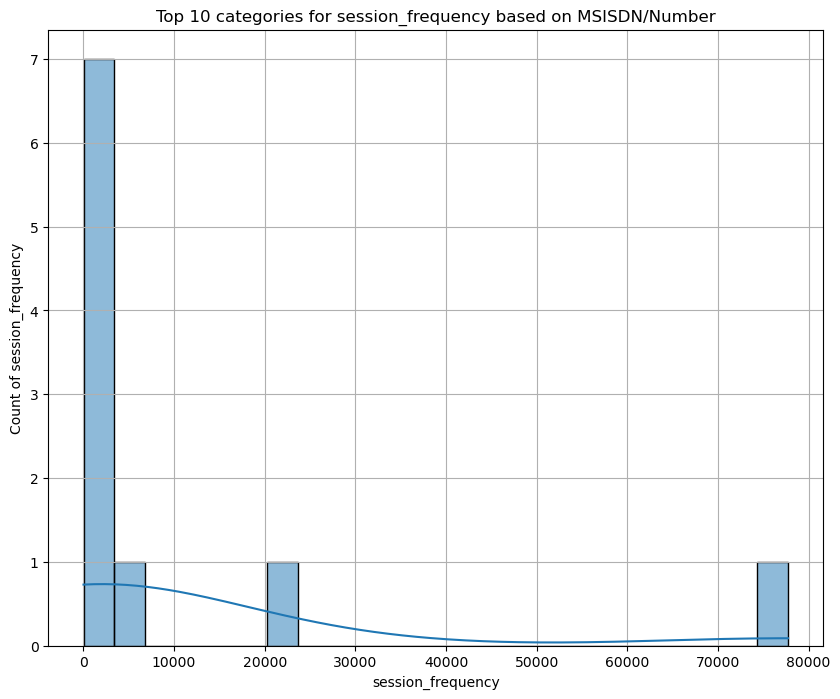

**************************************************
**************************************************
Top 10 categories for session_duration
86399958.0    80
86399957.0    79
86399945.0    78
86399953.0    78
86399928.0    77
86399947.0    77
86399963.0    76
86399965.0    75
86399941.0    75
86399972.0    75
Name: session_duration, dtype: int64


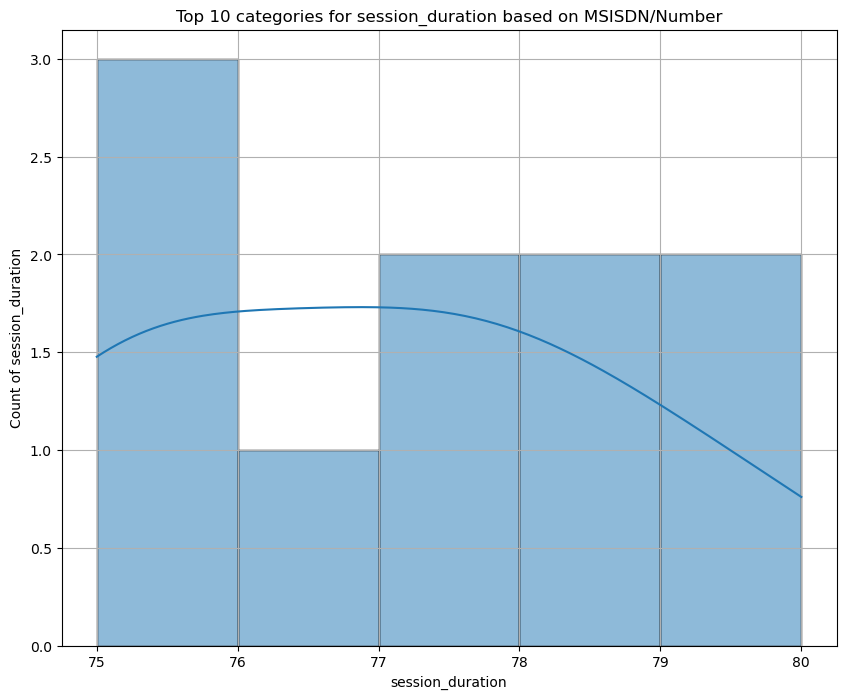

**************************************************
**************************************************
Top 10 categories for total_traffic
477037375.0    2
811996647.0    2
321294586.0    2
375293583.0    2
637726002.0    2
990132189.0    1
599733815.0    1
630092434.0    1
114976036.0    1
732463761.0    1
Name: total_traffic, dtype: int64


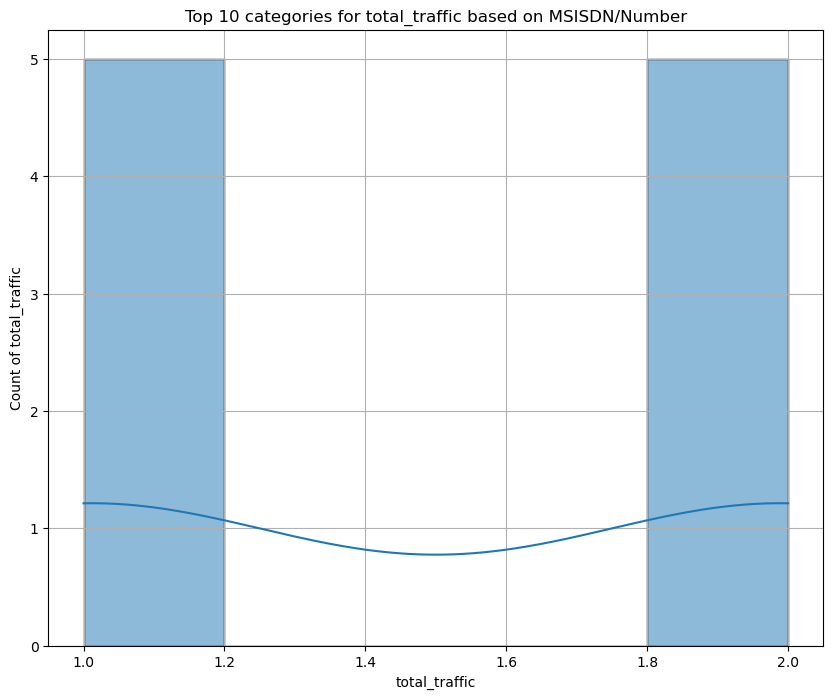

**************************************************
**************************************************
Top 10 categories for Social Media DL (Bytes)
2450530.0    3
1591078.0    3
2586604.0    3
2334058.0    3
3194199.0    3
2159055.0    3
2106903.0    3
2028429.0    3
802637.0     3
3263599.0    3
Name: Social Media DL (Bytes), dtype: int64


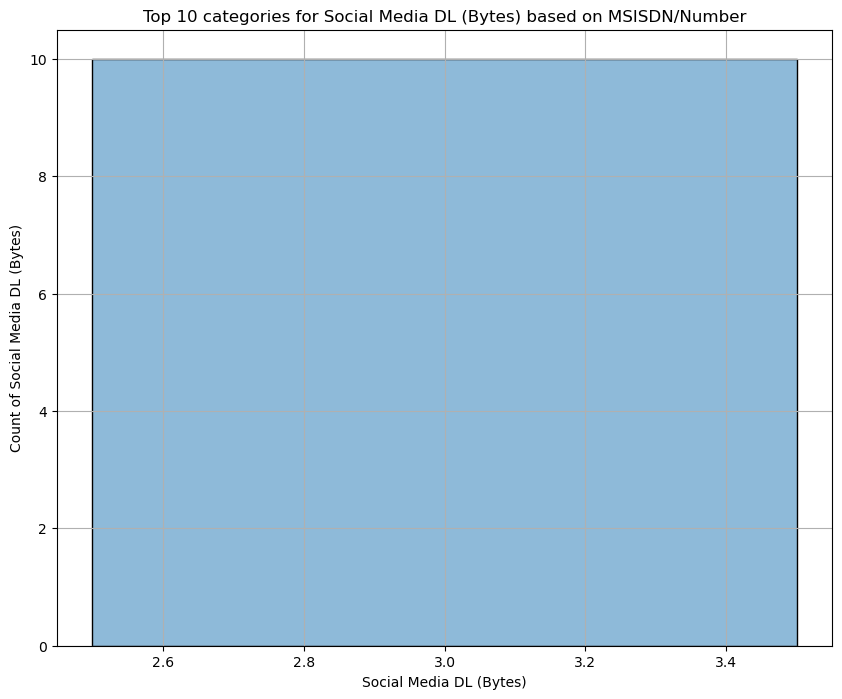

**************************************************
**************************************************
Top 10 categories for Social Media UL (Bytes)
61754.0    9
57952.0    9
22250.0    9
40418.0    8
29179.0    8
60828.0    8
51638.0    8
65459.0    8
53496.0    7
51338.0    7
Name: Social Media UL (Bytes), dtype: int64


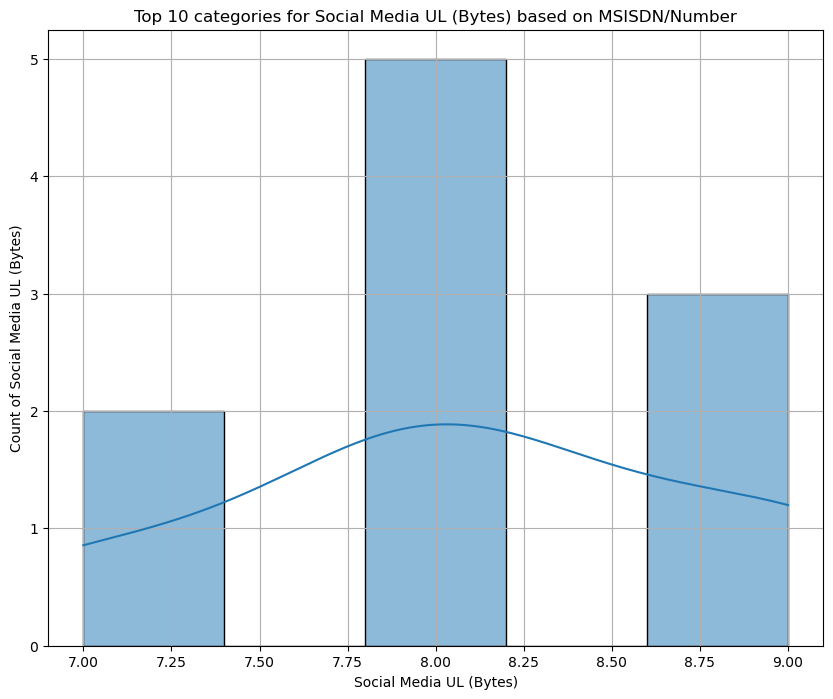

**************************************************
**************************************************
Top 10 categories for Google DL (Bytes)
6839538.0    3
8662757.0    3
128061.0     2
3975587.0    2
7326227.0    2
7614216.0    2
5325995.0    2
6653920.0    2
7040783.0    2
5442830.0    2
Name: Google DL (Bytes), dtype: int64


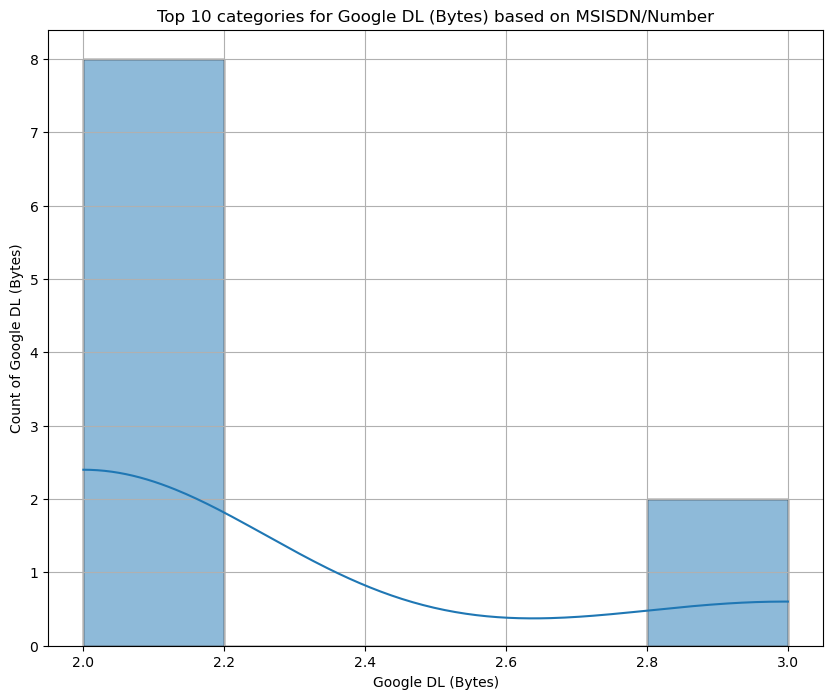

**************************************************
**************************************************
Top 10 categories for Google UL (Bytes)
2560372.0    3
3818169.0    3
2305277.0    3
2856925.0    3
3120933.0    3
350338.0     3
3557768.0    3
716419.0     2
2463948.0    2
1173790.0    2
Name: Google UL (Bytes), dtype: int64


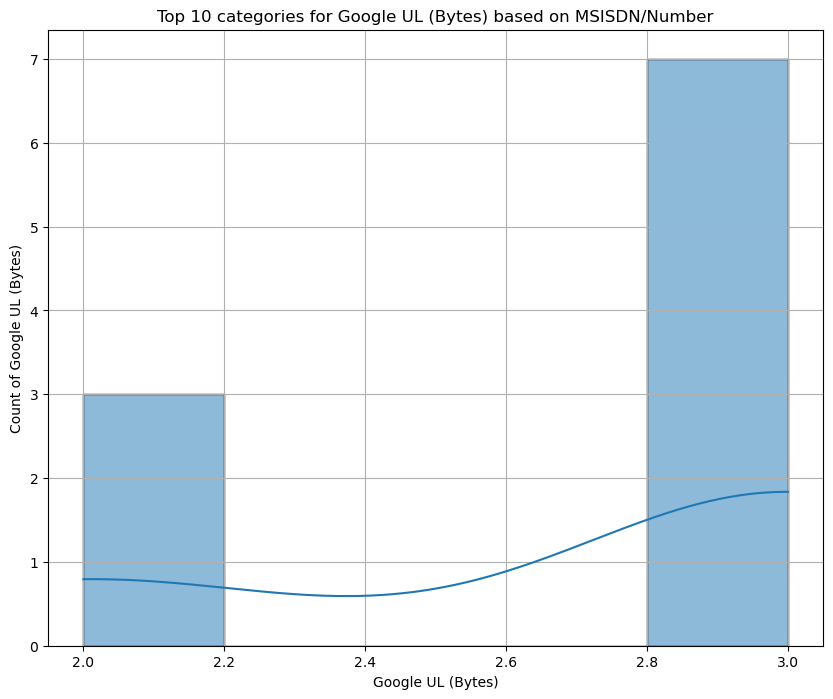

**************************************************
**************************************************
Top 10 categories for Email DL (Bytes)
3177858.0    3
3028657.0    3
2243709.0    3
3536751.0    3
1113690.0    3
2863091.0    3
136430.0     3
1212700.0    3
2144315.0    3
2978829.0    3
Name: Email DL (Bytes), dtype: int64


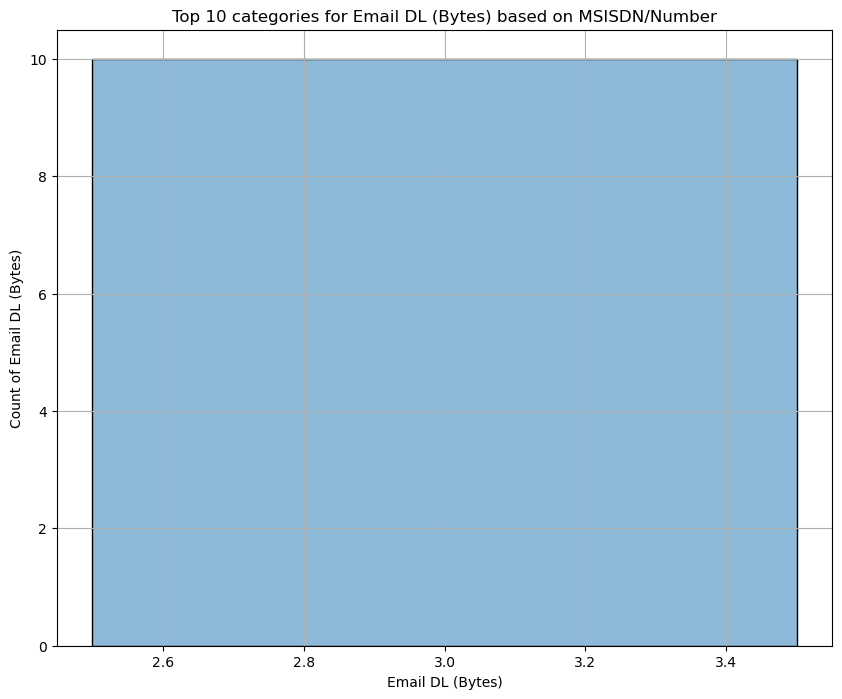

**************************************************
**************************************************
Top 10 categories for Email UL (Bytes)
326774.0    4
63879.0     4
590111.0    4
305354.0    4
893249.0    4
909694.0    4
598230.0    4
505716.0    4
382070.0    3
676010.0    3
Name: Email UL (Bytes), dtype: int64


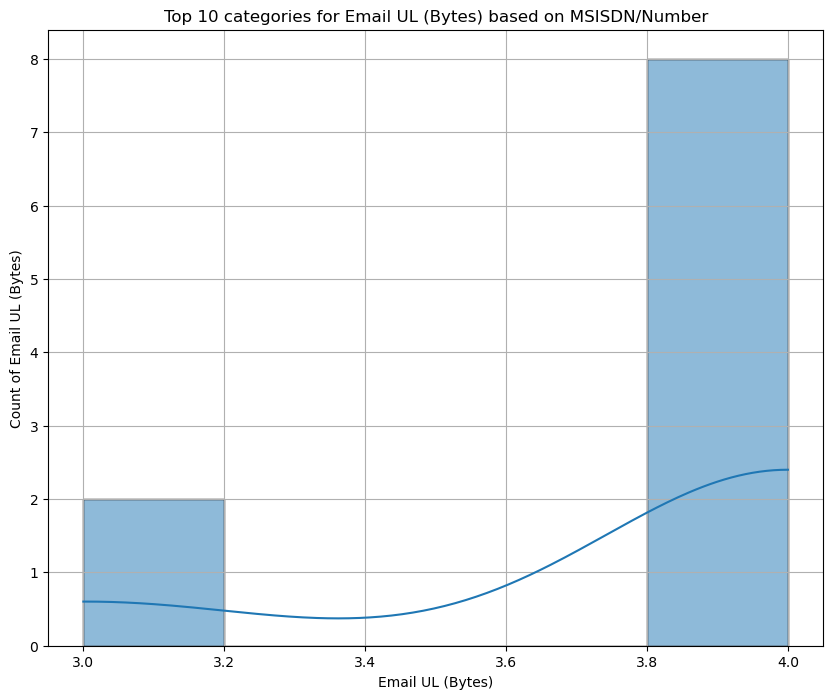

**************************************************
**************************************************
Top 10 categories for Youtube DL (Bytes)
19739158.0    2
3364291.0     2
16900080.0    2
5712949.0     2
12073292.0    2
10633865.0    2
21503895.0    2
13920466.0    2
13426045.0    2
11887559.0    2
Name: Youtube DL (Bytes), dtype: int64


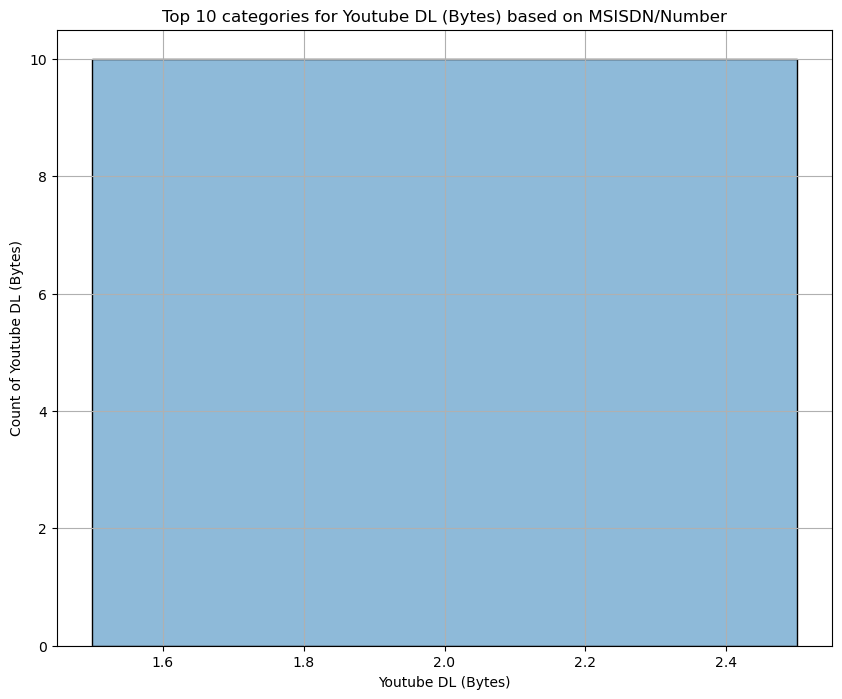

**************************************************
**************************************************
Top 10 categories for Youtube UL (Bytes)
2027396.0     2
25167269.0    2
830962.0      2
4697007.0     2
14360637.0    2
13520710.0    2
212990.0      2
12450119.0    2
5681048.0     2
3650869.0     2
Name: Youtube UL (Bytes), dtype: int64


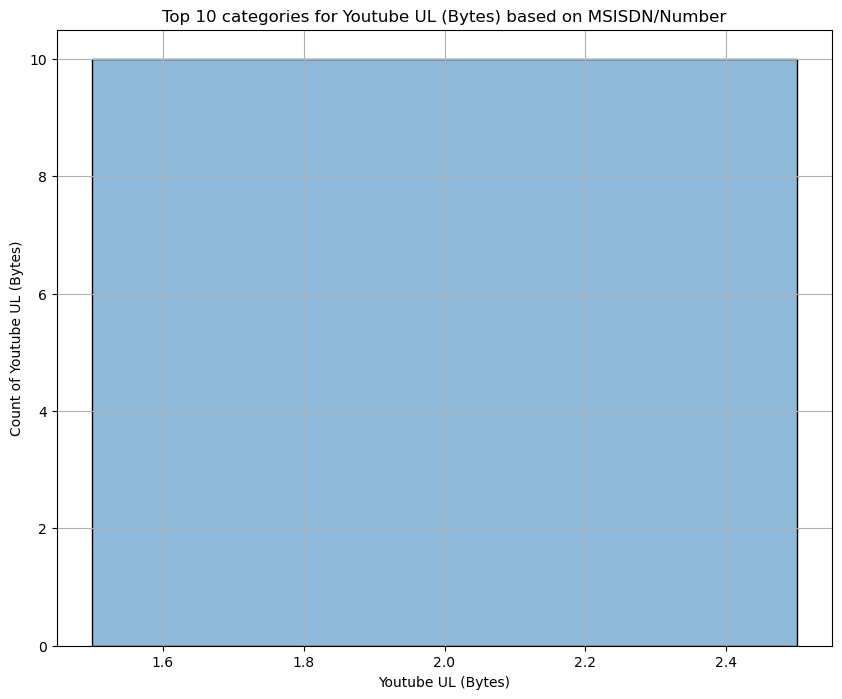

**************************************************
**************************************************
Top 10 categories for Netflix DL (Bytes)
11475034.0    2
2097111.0     2
21048072.0    2
4474859.0     2
15206145.0    2
17260640.0    2
8029884.0     2
660720.0      2
21841249.0    2
6288023.0     2
Name: Netflix DL (Bytes), dtype: int64


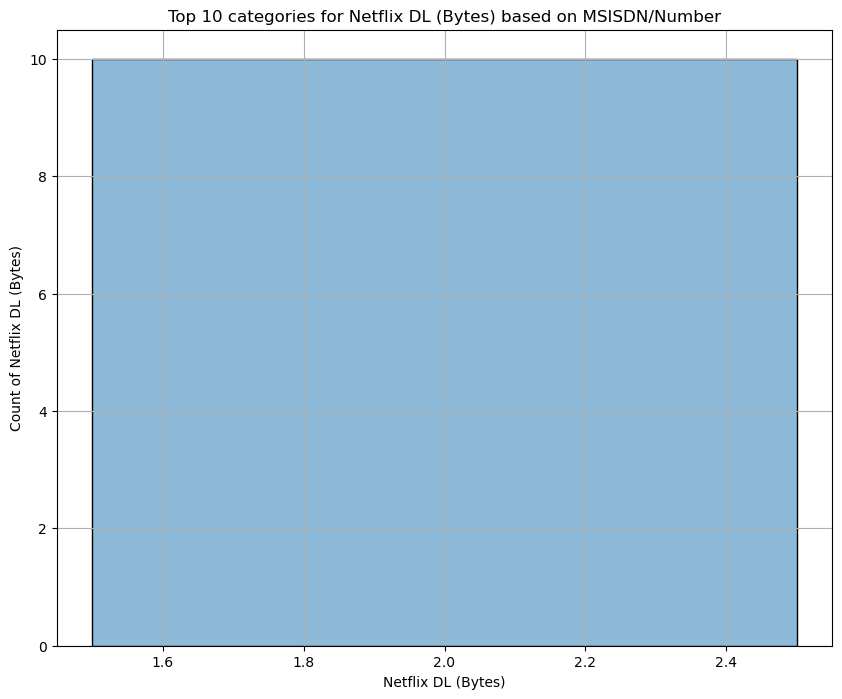

**************************************************
**************************************************
Top 10 categories for Netflix UL (Bytes)
9451822.0     2
20814068.0    2
4462331.0     2
15688382.0    2
20864896.0    2
16801656.0    2
20201855.0    2
10121404.0    2
721657.0      2
13901213.0    2
Name: Netflix UL (Bytes), dtype: int64


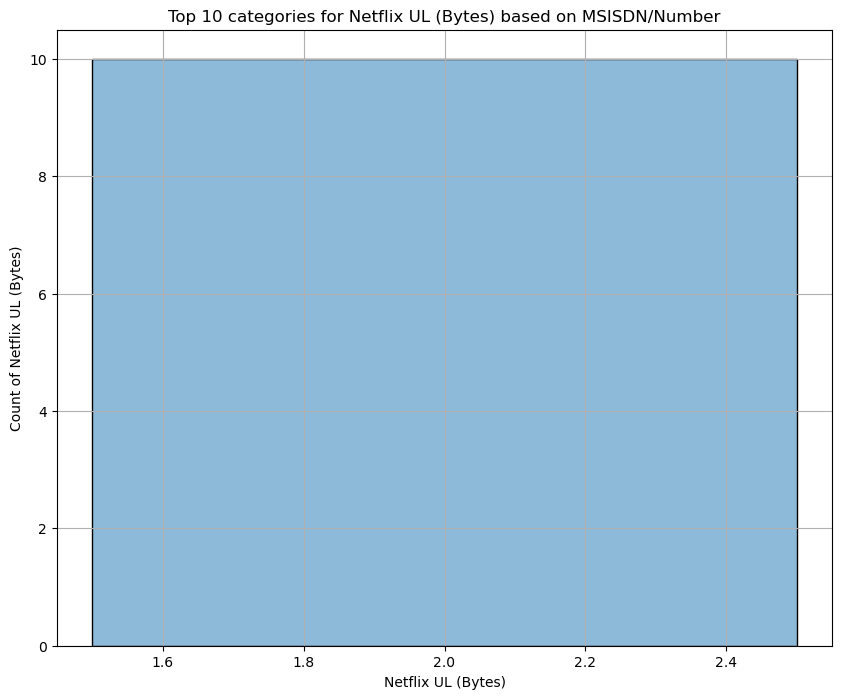

**************************************************
**************************************************
Top 10 categories for Gaming DL (Bytes)
6.862361e+08    2
1.153043e+08    2
1.397145e+08    2
8.236561e+08    2
7.681073e+08    2
6.814473e+08    2
6.384263e+08    2
6.476069e+08    2
3.880748e+08    1
1.308981e+09    1
Name: Gaming DL (Bytes), dtype: int64


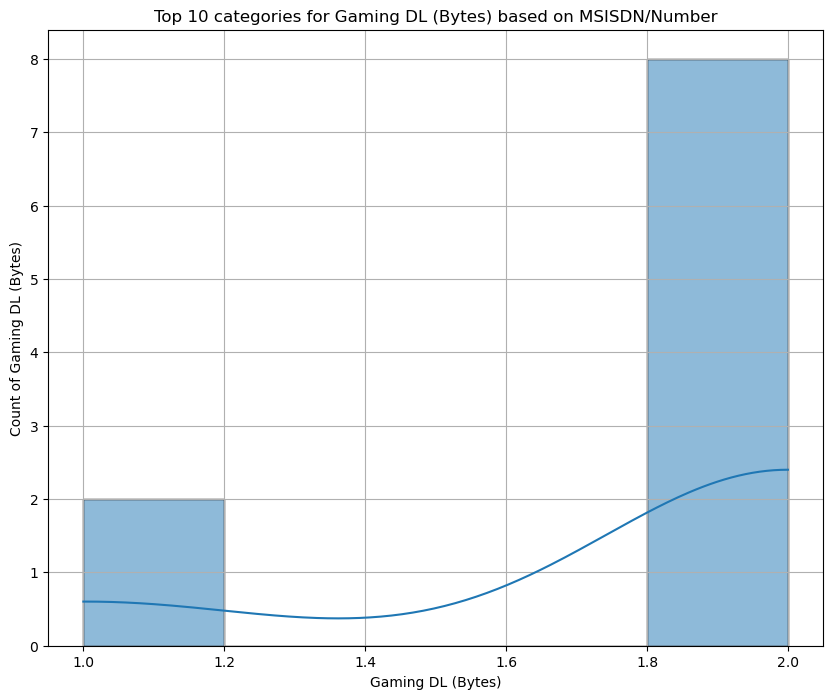

**************************************************
**************************************************
Top 10 categories for Gaming UL (Bytes)
10079814.0    3
13075526.0    2
6141584.0     2
11863263.0    2
14957018.0    2
11308299.0    2
3965941.0     2
16450457.0    2
14365103.0    2
8143373.0     2
Name: Gaming UL (Bytes), dtype: int64


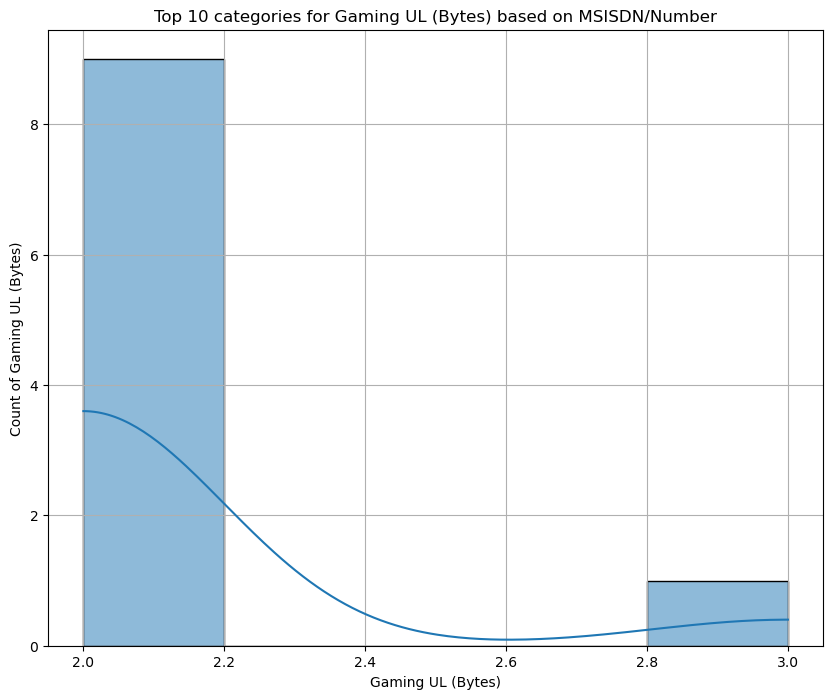

**************************************************
**************************************************
Top 10 categories for Other DL (Bytes)
7.027837e+08    2
3.935565e+08    2
1.085264e+08    2
7.372510e+08    2
1.586779e+08    2
6.261997e+08    2
1.026521e+09    1
4.338359e+08    1
5.950361e+08    1
5.406972e+08    1
Name: Other DL (Bytes), dtype: int64


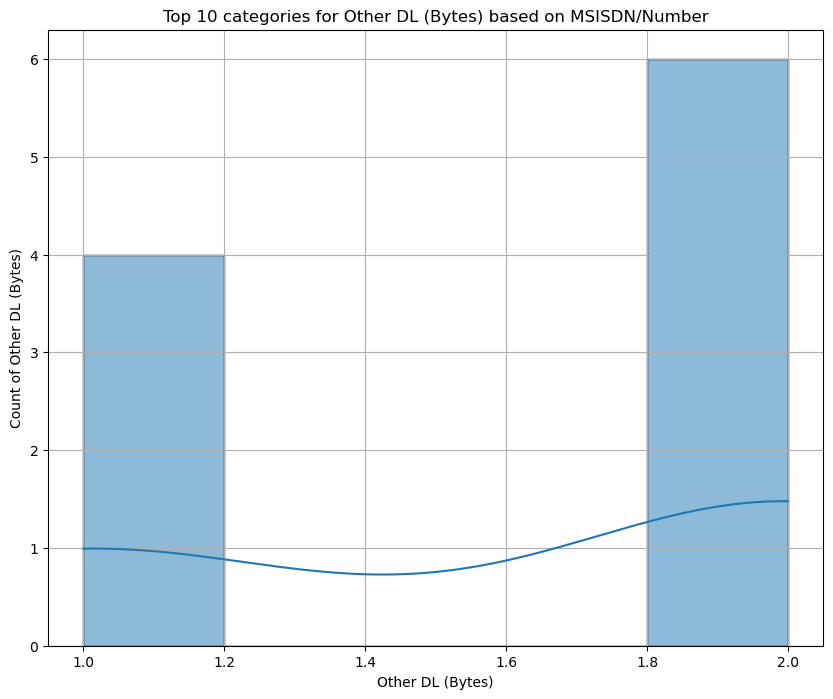

**************************************************
**************************************************
Top 10 categories for Other UL (Bytes)
8125986.0     3
461452.0      2
7607832.0     2
10052324.0    2
9471492.0     2
16037896.0    2
8663589.0     2
8925465.0     2
6213273.0     2
13366223.0    2
Name: Other UL (Bytes), dtype: int64


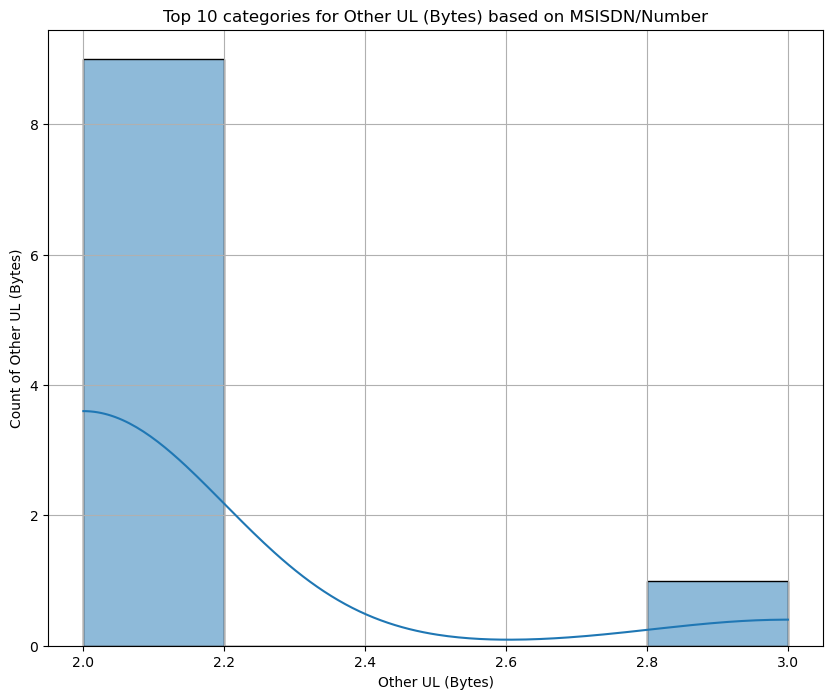

**************************************************


In [36]:
for col in aggregated_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(aggregated_data[col].value_counts().sort_values(ascending = False).head(10))
    index = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).index
    values = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,8])
    sns.histplot(values,kde=True)
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {} based on MSISDN/Number".format(col))
    plt.grid()
    plt.show();
    print("*"*50)

In [37]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106857 entries, 33601001722.0 to 882397108489451.0
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   session_frequency        106857 non-null  float64
 1   session_duration         106857 non-null  float64
 2   total_traffic            106857 non-null  float64
 3   Social Media DL (Bytes)  106857 non-null  float64
 4   Social Media UL (Bytes)  106857 non-null  float64
 5   Google DL (Bytes)        106857 non-null  float64
 6   Google UL (Bytes)        106857 non-null  float64
 7   Email DL (Bytes)         106857 non-null  float64
 8   Email UL (Bytes)         106857 non-null  float64
 9   Youtube DL (Bytes)       106857 non-null  float64
 10  Youtube UL (Bytes)       106857 non-null  float64
 11  Netflix DL (Bytes)       106857 non-null  float64
 12  Netflix UL (Bytes)       106857 non-null  float64
 13  Gaming DL (Bytes)        106857 no

In [38]:
engagement_metrics = ['session_frequency', 'session_duration', 'total_traffic', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                      'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)']

aggregated_data = dframe.groupby('MSISDN/Number')[engagement_metrics].sum()
top_10_customers = {}

for metric in engagement_metrics:
    top_10_customers[metric] = aggregated_data.nlargest(10, metric)

for metric, top_10 in top_10_customers.items():
    print(f"Top 10 customers for {metric}:")
    print(top_10)
    print()

Top 10 customers for session_frequency:
               session_frequency  session_duration  total_traffic  \
MSISDN/Number                                                       
4.188282e+10           1136356.0      7.255155e+10   5.317447e+11   
3.362632e+10               324.0      8.791937e+09   7.971167e+09   
3.361489e+10               289.0      9.966906e+09   8.846226e+09   
3.362578e+10               289.0      1.855376e+10   8.499621e+09   
3.365973e+10               256.0      4.035436e+09   7.705863e+09   
3.367588e+10               225.0      4.865954e+09   7.891111e+09   
3.376054e+10               225.0      9.279442e+09   8.514774e+09   
3.366716e+10               169.0      8.744922e+09   5.618394e+09   
3.360313e+10               144.0      6.287767e+09   4.976195e+09   
3.360452e+10               144.0      5.207995e+09   5.487855e+09   

               Gaming DL (Bytes)  Gaming UL (Bytes)  Social Media DL (Bytes)  \
MSISDN/Number                                      

 #### Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement. 

0    98308
2     8548
1        1
Name: Cluster, dtype: int64

Top 10 customers in Cluster 0:
               session_frequency  session_duration  total_traffic
MSISDN/Number                                                    
3.366856e+10                 1.0      1.030532e+09    192989248.0
3.366283e+10                 1.0      9.904009e+08    330122677.0
3.366271e+10                 1.0      9.514531e+08    494313738.0
3.376378e+10                 1.0      9.040250e+08    613904375.0
3.366447e+10                 1.0      8.898349e+08    568809782.0
3.197021e+12                 1.0      8.773853e+08    232123971.0
3.376375e+10                 1.0      8.698305e+08     97053379.0
3.365885e+10                 1.0      8.684181e+08    486937142.0
3.367817e+10                 1.0      8.631179e+08    599771365.0
3.365875e+10                 1.0      8.510803e+08    633036027.0

Top 10 customers in Cluster 1:
               session_frequency  session_duration  total_traffic
MSISDN/Number    

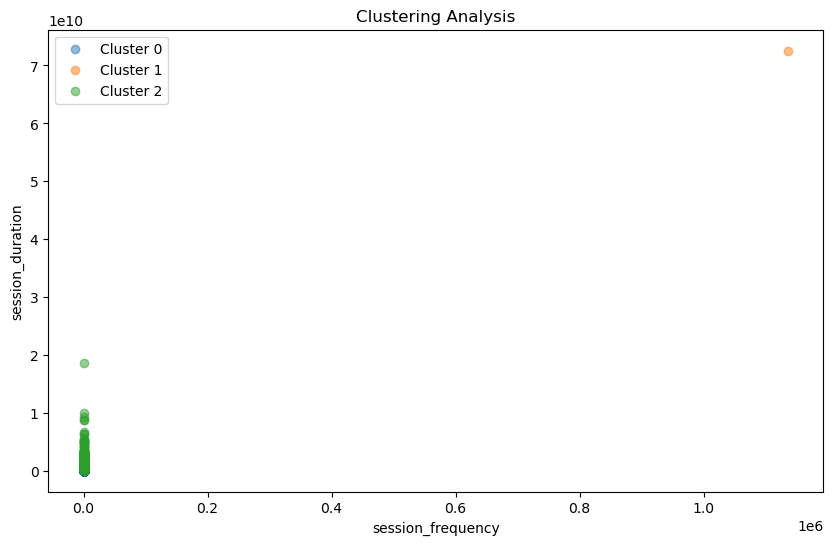

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data[engagement_metrics])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)



# Assign cluster labels to data
customer_clusters = kmeans.labels_

# Add cluster labels to the aggregate dataframe
aggregated_data['Cluster'] = customer_clusters

# Print the number of customers in each cluster
print(aggregated_data['Cluster'].value_counts())

# Print the details of the top 10 customers in each cluster
for cluster in range(3):
    print(f"\nTop 10 customers in Cluster {cluster}:")
    top_10_customers = aggregated_data[aggregated_data['Cluster'] == cluster].nlargest(10, 'session_duration')
    print(top_10_customers[['session_frequency', 'session_duration', 'total_traffic']])

x_metric = 'session_frequency'
y_metric = 'session_duration'

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = aggregated_data[aggregated_data['Cluster'] == cluster]
    plt.scatter(cluster_data[x_metric], cluster_data[y_metric], label=f'Cluster {cluster}',alpha=0.5)
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.title('Clustering Analysis')
plt.legend()
plt.show()


In [40]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Engagement Cluster'] = cluster_labels
cluster_metrics = aggregated_data.groupby('Engagement Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])
print(cluster_metrics)
# Calculate the standard deviation for each metric within each cluster
cluster_std = aggregated_data.groupby('Engagement Cluster')[engagement_metrics].std()


                   session_frequency                                      \
                                 min        max          mean        sum   
Engagement Cluster                                                         
0                                1.0        9.0  1.635035e+00   160737.0   
1                          1136356.0  1136356.0  1.136356e+06  1136356.0   
2                                1.0      324.0  1.360178e+01   116268.0   

                   session_duration                                            \
                                min           max          mean           sum   
Engagement Cluster                                                              
0                      7.142988e+06  1.030532e+09  1.179412e+08  1.159456e+13   
1                      7.255155e+10  7.255155e+10  7.255155e+10  7.255155e+10   
2                      3.385455e+07  1.855376e+10  4.707950e+08  4.024356e+12   

                   total_traffic                        

In [41]:
# Define a dictionary to store the cluster statistics
cluster_stats = {}

# Iterate over each cluster
for cluster in range(3):
    cluster_data = aggregated_data[aggregated_data['Engagement Cluster'] == cluster]
    cluster_stats[cluster] = {}

    # Calculate the mean, maximum, minimum, and sum values for each feature within the cluster
    for metric in engagement_metrics:
        metric_stats = {
            'mean': cluster_data[metric].mean(),
            'max': cluster_data[metric].max(),
            'min': cluster_data[metric].min(),
            'sum': cluster_data[metric].sum()
        }
        cluster_stats[cluster][metric] = metric_stats

# Print the cluster statistics
for cluster in range(3):
    print(f"\nCluster {cluster} Statistics:")
    for metric in engagement_metrics:
        metric_stats = cluster_stats[cluster][metric]
        print(f"{metric}:")
        print(f"   Mean: {metric_stats['mean']}")
        print(f"   Max: {metric_stats['max']}")
        print(f"   Min: {metric_stats['min']}")
        print(f"   Sum: {metric_stats['sum']}")


Cluster 0 Statistics:
session_frequency:
   Mean: 1.6350347886235097
   Max: 9.0
   Min: 1.0
   Sum: 160737.0
session_duration:
   Mean: 117941196.16985393
   Max: 1030531765.0
   Min: 7142988.0
   Sum: 11594563113066.0
total_traffic:
   Mean: 598691258.2265736
   Max: 2183190386.0
   Min: 33249009.0
   Sum: 58856140213738.0
Gaming DL (Bytes):
   Mean: 509630672.80885583
   Max: 2000504867.0
   Min: 2516.0
   Sum: 50100772182493.0
Gaming UL (Bytes):
   Mean: 10024165.254068844
   Max: 40665249.0
   Min: 59.0
   Sum: 985455637797.0
Social Media DL (Bytes):
   Mean: 2171553.600520812
   Max: 8850374.0
   Min: 12.0
   Sum: 213481091360.0
Social Media UL (Bytes):
   Mean: 39818.02450461814
   Max: 156487.0
   Min: 0.0
   Sum: 3914430353.0
Google DL (Bytes):
   Mean: 6949347.443860113
   Max: 28369470.0
   Min: 207.0
   Sum: 683176448511.0
Google UL (Bytes):
   Mean: 2484402.6841966067
   Max: 10148561.0
   Min: 3.0
   Sum: 244236659078.0
Email DL (Bytes):
   Mean: 2163432.693290475
   Max

## To calculate cluster metrics for each attribute or feature in the given matrix, we can compute the mean values for each column (feature) across the clusters. This will provide an average value for each attribute within each cluster.

In [42]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Engagement Cluster'] = cluster_labels

# Calculate the standard deviation for each metric within each cluster using a for loop
cluster_std = {}
for cluster in range(3):
    cluster_data = aggregated_data[aggregated_data['Engagement Cluster'] == cluster]
    cluster_std[cluster] = cluster_data[engagement_metrics].std()

# Print the standard deviation for each metric within each cluster
for cluster, std in cluster_std.items():
    print(f"\nCluster {cluster} - Standard Deviation:")
    print(std)


Cluster 0 - Standard Deviation:
session_frequency          1.244935e+00
session_duration           8.217063e+07
total_traffic              3.334799e+08
Gaming DL (Bytes)          3.163960e+08
Gaming UL (Bytes)          6.255751e+06
Social Media DL (Bytes)    1.353657e+06
Social Media UL (Bytes)    2.491542e+04
Google DL (Bytes)          4.314875e+06
Google UL (Bytes)          1.551014e+06
Email DL (Bytes)           1.345374e+06
Email UL (Bytes)           3.527294e+05
Youtube DL (Bytes)         8.754861e+06
Youtube UL (Bytes)         8.273684e+06
Netflix DL (Bytes)         8.756479e+06
Netflix UL (Bytes)         8.316734e+06
Other DL (Bytes)           3.171436e+08
Other UL (Bytes)           6.213681e+06
dtype: float64

Cluster 1 - Standard Deviation:
session_frequency         NaN
session_duration          NaN
total_traffic             NaN
Gaming DL (Bytes)         NaN
Gaming UL (Bytes)         NaN
Social Media DL (Bytes)   NaN
Social Media UL (Bytes)   NaN
Google DL (Bytes)         NaN

#### • Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings

In [43]:
# Compute the minimum, maximum, average, and total non-normalized metrics for each cluster
cluster_metrics_non_normalized = aggregated_data.groupby('Engagement Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])

# Display the metrics for each cluster
print(cluster_metrics_non_normalized)
# Define the engagement metrics to visualize
metrics_to_visualize = ['session_frequency', 'session_duration', 'total_traffic']

                   session_frequency                                      \
                                 min        max          mean        sum   
Engagement Cluster                                                         
0                                1.0        9.0  1.635035e+00   160737.0   
1                          1136356.0  1136356.0  1.136356e+06  1136356.0   
2                                1.0      324.0  1.360178e+01   116268.0   

                   session_duration                                            \
                                min           max          mean           sum   
Engagement Cluster                                                              
0                      7.142988e+06  1.030532e+09  1.179412e+08  1.159456e+13   
1                      7.255155e+10  7.255155e+10  7.255155e+10  7.255155e+10   
2                      3.385455e+07  1.855376e+10  4.707950e+08  4.024356e+12   

                   total_traffic                        

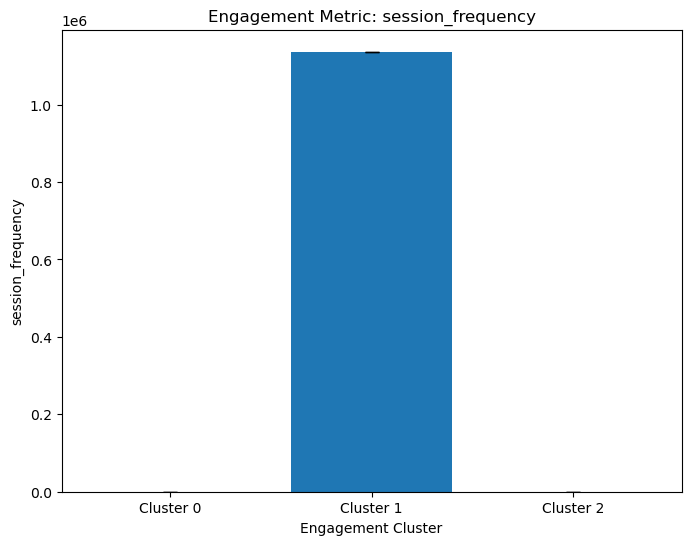

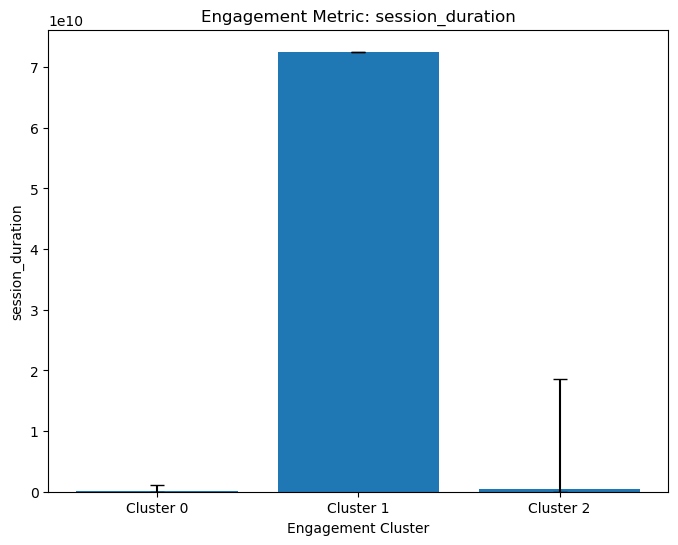

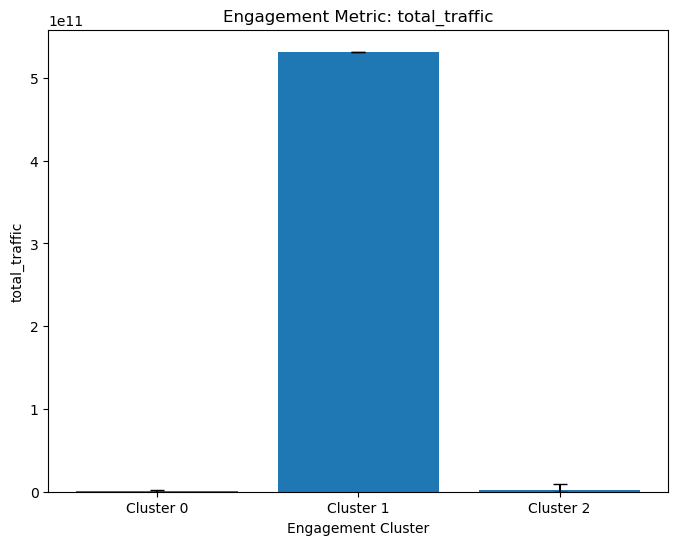

In [44]:

# Plot the metrics for each cluster
for metric in metrics_to_visualize:
    plt.figure(figsize=(8, 6))
    cluster_values = cluster_metrics_non_normalized[metric]
    x_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
    x = range(len(x_labels))
    plt.bar(x, cluster_values['mean'], yerr=[cluster_values['mean'] - cluster_values['min'], cluster_values['max'] - cluster_values['mean']],
            capsize=5)
    plt.xlabel('Engagement Cluster')
    plt.ylabel(metric)
    plt.title(f'Engagement Metric: {metric}')
    plt.xticks(x, x_labels)
    plt.show()

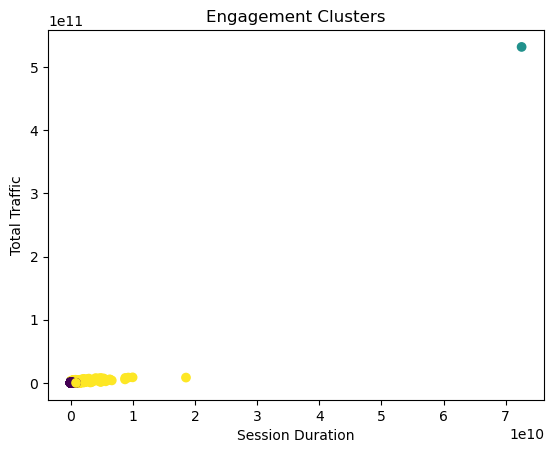

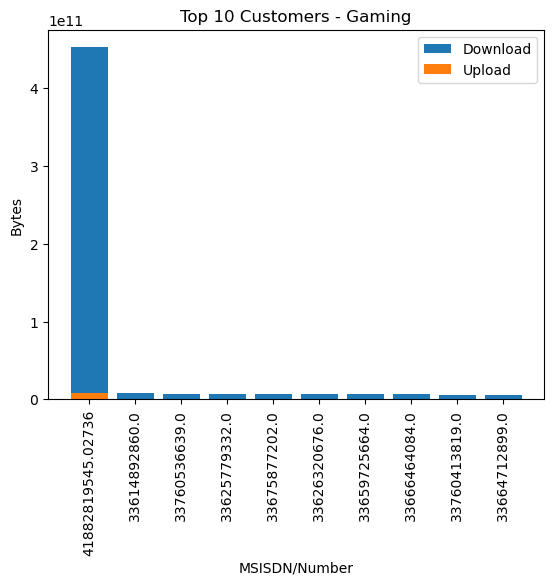

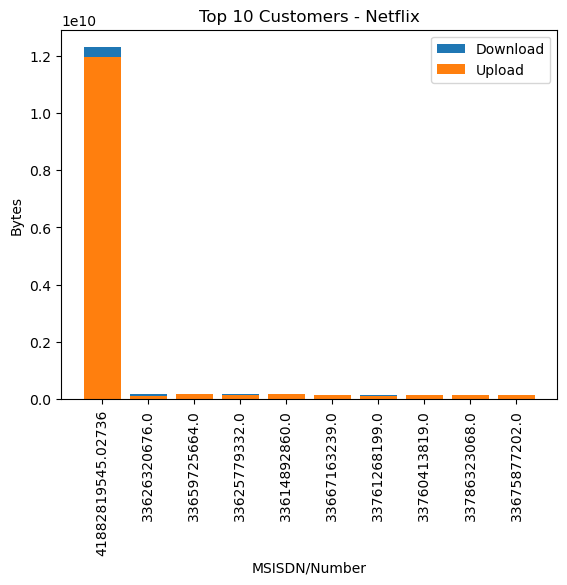

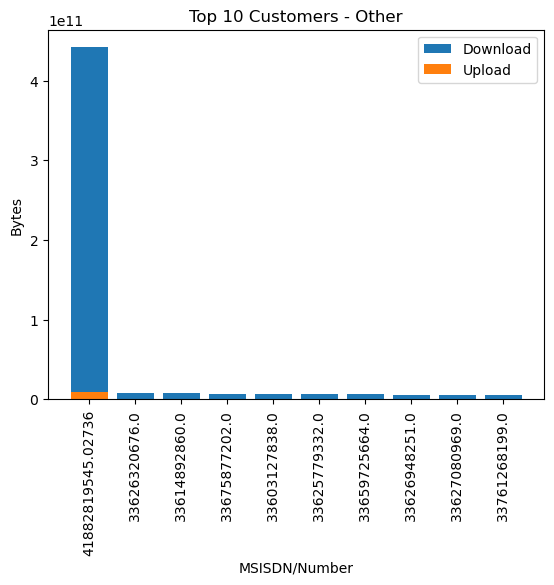

In [45]:
# Plot the engagement clusters
plt.scatter(aggregated_data['session_duration'], aggregated_data['total_traffic'], c=cluster_labels)
plt.xlabel('Session Duration')
plt.ylabel('Total Traffic')
plt.title('Engagement Clusters')
plt.show()

# Plot the top 3 most used applications
top_3_applications = ['Gaming', 'Netflix', 'Other']

for app in top_3_applications:
    plt.figure()  # Create a new figure for each application
    top_10_customers = aggregated_data.sort_values(by=f"{app} DL (Bytes)", ascending=False).head(10)
    x = range(len(top_10_customers))
    plt.bar(x, top_10_customers[f"{app} DL (Bytes)"], label='Download')
    plt.bar(x, top_10_customers[f"{app} UL (Bytes)"], label='Upload')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Bytes')
    plt.title(f'Top 10 Customers - {app}')
    plt.xticks(x, top_10_customers.index, rotation='vertical')
    plt.legend()
    plt.show()

In [46]:
top_10_customers

session_frequency  session_duration  total_traffic  \
MSISDN/Number                                                       
4.188282e+10           1136356.0      7.255155e+10   5.317447e+11   
3.362632e+10               324.0      8.791937e+09   7.971167e+09   
3.361489e+10               289.0      9.966906e+09   8.846226e+09   
3.367588e+10               225.0      4.865954e+09   7.891111e+09   
3.360313e+10               144.0      6.287767e+09   4.976195e+09   
3.362578e+10               289.0      1.855376e+10   8.499621e+09   
3.365973e+10               256.0      4.035436e+09   7.705863e+09   
3.362695e+10               100.0      2.415040e+09   4.825638e+09   
3.362708e+10               144.0      4.703519e+09   5.754731e+09   
3.376127e+10               100.0      3.481634e+09   5.051114e+09   

               Gaming DL (Bytes)  Gaming UL (Bytes)  Social Media DL (Bytes)  \
MSISDN/Number                                                                  
4.188282e+10        4.527450e+11       8.733066e+09             1.937715e+09   
3.362632e+10        6.745734e+09       1.418386e+08             4.274384e+07   
3.361489e+10        7.622035e+09       1.273968e+08             2.774974e+07   
3.367588e+10        6.863307e+09       1.072606e+08             1.865536e+07   
3.360313e+10        4.108482e+09       8.296289e+07             2.277668e+07   
3.362578e+10        7.171884e+09       1.547897e+08             2.656412e+07   
3.365973e+10        6.609900e+09       1.156587e+08             3.490044e+07   
3.362695e+10        4.099560e+09       8.220240e+07             1.658993e+07   
3.362708e+10        4.880017e+09       9.233558e+07             1.743867e+07   
3.376127e+10        4.165410e+09       1.086893e+08             1.420143e+07   

               Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
MSISDN/Number                                                                  
4.188282e+10              3.610230e+07       6.007942e+09       2.240634e+09   
3.362632e+10              6.309420e+05       1.161065e+08       3.608540e+07   
3.361489e+10              5.448000e+05       9.394171e+07       3.403208e+07   
3.367588e+10              5.675570e+05       8.300299e+07       2.685751e+07   
3.360313e+10              3.011460e+05       7.394206e+07       1.298696e+07   
3.362578e+10              5.713790e+05       1.079047e+08       3.440318e+07   
3.365973e+10              5.119140e+05       9.095855e+07       2.555780e+07   
3.362695e+10              3.320680e+05       5.762776e+07       1.236019e+07   
3.362708e+10              3.702400e+05       6.272240e+07       2.440352e+07   
3.376127e+10              2.946530e+05       7.294980e+07       2.414018e+07   

               Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
MSISDN/Number                                                           
4.188282e+10       1.904048e+09      4.958324e+08        1.249464e+10   
3.362632e+10       3.340478e+07      9.013997e+06        1.640487e+08   
3.361489e+10       3.360721e+07      7.181423e+06        1.998234e+08   
3.367588e+10       2.428472e+07      7.229698e+06        1.586652e+08   
3.360313e+10       2.034373e+07      5.855167e+06        1.589767e+08   
3.362578e+10       3.189541e+07      8.738554e+06        2.378830e+08   
3.365973e+10       2.990765e+07      6.092145e+06        1.196581e+08   
3.362695e+10       1.297899e+07      4.503799e+06        8.547465e+07   
3.362708e+10       1.735396e+07      6.213264e+06        1.873233e+08   
3.376127e+10       1.576884e+07      4.984880e+06        1.190565e+08   

               Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
MSISDN/Number                                                               
4.188282e+10         1.184609e+10        1.228898e+10        1.196459e+10   
3.362632e+10         2.104343e+08        1.994792e+08        1.292465e+08   
3.361489e+10         1.945468e+08        1.795860e+08        1.818151e+08   
3.

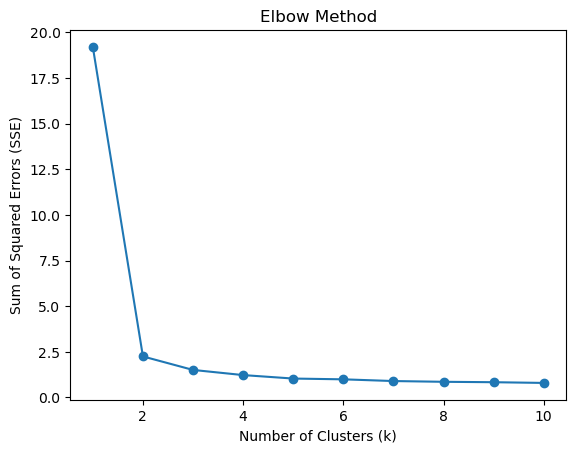

In [47]:

sse = {}
kmax = 10

for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(normalized_data)
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

# K=3

####  Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Aggregate the metrics per customer id (MSISDN) and report the top 10 customers per engagement metric
aggregated_data = dframe.groupby('MSISDN/Number').agg({
    'session_frequency': 'sum',
    'session_duration': 'sum',
    'total_traffic': 'sum',
    'Gaming DL (Bytes)':'sum',
    'Gaming UL (Bytes)':'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})
# Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data)

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Cluster'] = cluster_labels

# Compute the minimum, maximum, average, and total non-normalized metrics for each cluster
metrics_per_cluster = aggregated_data.groupby('Cluster').agg(['min', 'max', 'mean', 'sum'])

# Aggregate user total traffic per application and derive the top 10 most engaged users per application
engaged_users_per_app = {}
top_10_users_per_app = {}
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

for app in applications:
    engaged_users_per_app[app] = aggregated_data[f'{app} DL (Bytes)'] + aggregated_data[f'{app} UL (Bytes)']
    top_10_users_per_app[app] = engaged_users_per_app[app].nlargest(10)

# Print the results
print("Engaged Users per Application:")
print(engaged_users_per_app)
print(50*"*")
print("\nTop 10 Most Engaged Users per Application:")
print(top_10_users_per_app)


Engaged Users per Application:
{'Social Media': MSISDN/Number
3.360100e+10    2.232135e+06
3.360100e+10    2.660565e+06
3.360100e+10    3.195623e+06
3.360101e+10    2.802940e+05
3.360101e+10    2.912542e+06
                    ...     
3.379000e+10    4.985690e+05
4.188282e+10    1.973817e+09
3.197021e+12    7.152240e+05
3.370000e+14    5.215660e+05
8.823971e+14    1.546088e+06
Length: 106857, dtype: float64, 'Google': MSISDN/Number
3.360100e+10    4.389005e+06
3.360100e+10    5.334863e+06
3.360100e+10    3.443126e+06
3.360101e+10    9.678493e+06
3.360101e+10    1.849962e+07
                    ...     
3.379000e+10    5.429705e+06
4.188282e+10    8.248577e+09
3.197021e+12    1.043866e+07
3.370000e+14    9.830617e+06
8.823971e+14    9.218647e+06
Length: 106857, dtype: float64, 'Email': MSISDN/Number
3.360100e+10    1.331362e+06
3.360100e+10    3.307781e+06
3.360100e+10    3.205380e+06
3.360101e+10    2.284670e+06
3.360101e+10    3.305469e+06
                    ...     
3.379000e+10   

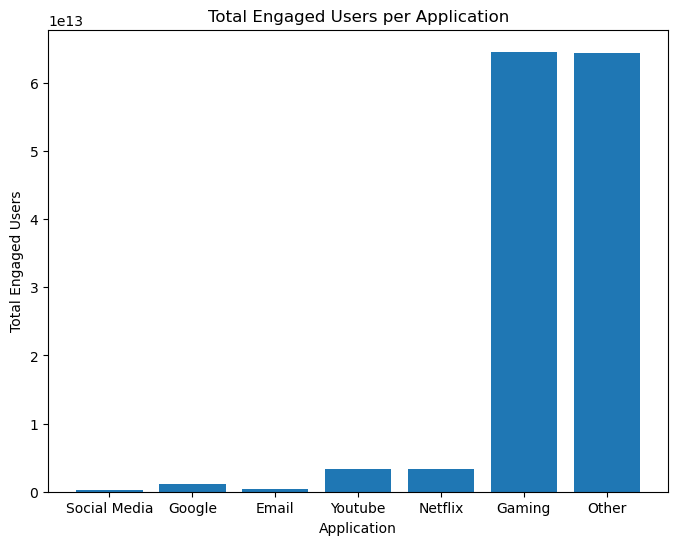

In [49]:
# Calculate the total engaged users per application
total_engaged_users = [engaged_users_per_app[app].sum() for app in applications]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(applications, total_engaged_users)
plt.xlabel('Application')
plt.ylabel('Total Engaged Users')
plt.title('Total Engaged Users per Application')

# Display the graph
plt.show()

####  Plot the top 3 most used applications using appropriate charts.

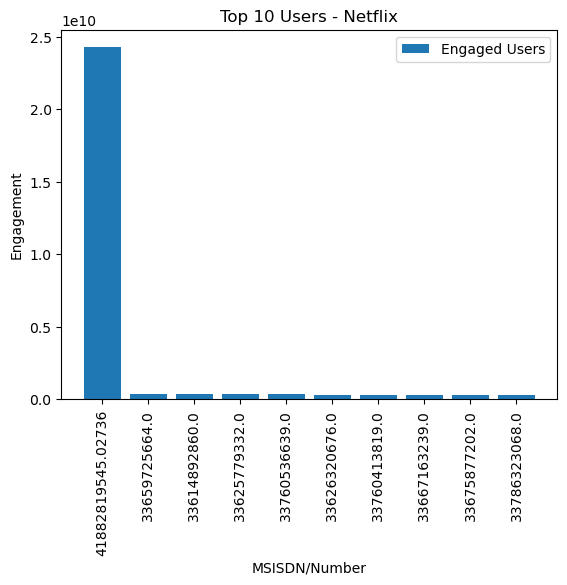

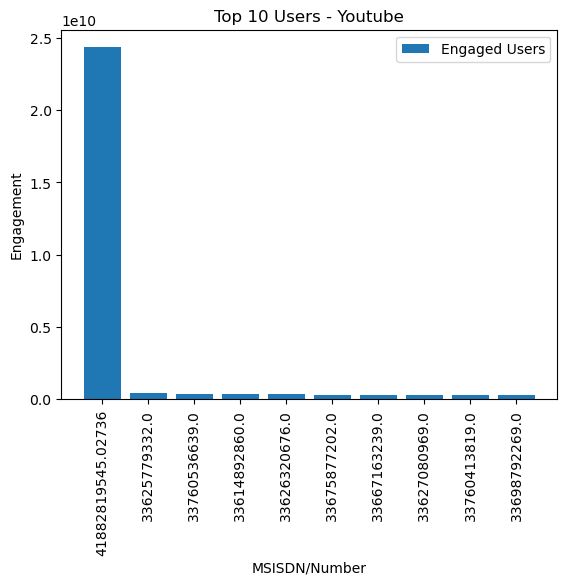

In [50]:
# Plot the top 3 most used applications
top_3_applications = ['Netflix','Youtube']

for app in top_3_applications:
    plt.figure()
    top_10_users = top_10_users_per_app[app]
    x = range(len(top_10_users))
    plt.bar(x, top_10_users, label='Engaged Users')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Engagement')
    plt.title(f'Top 10 Users - {app}')
    plt.xticks(x, top_10_users.index, rotation='vertical')
    plt.legend()
    plt.show()

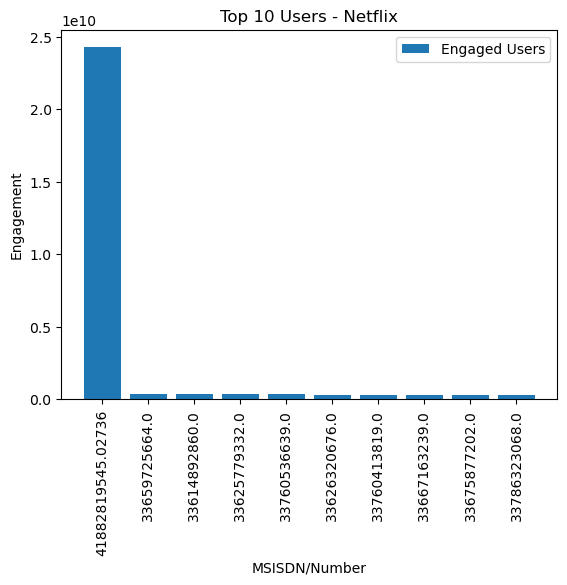

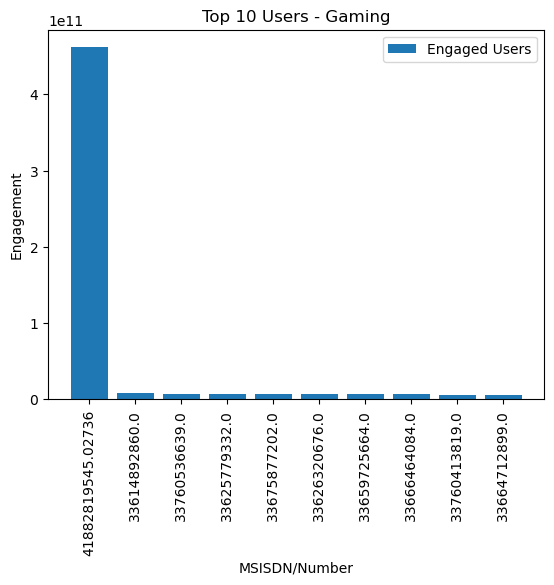

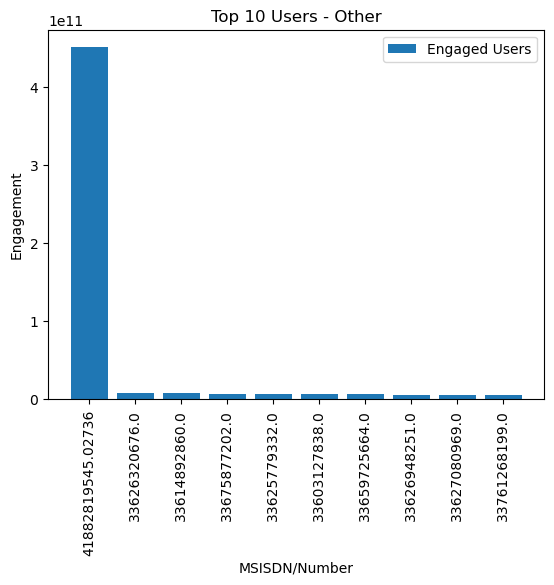

In [51]:
# Plot the top 3 most used applications
top_3_applications = ['Netflix','Gaming', 'Other']

for app in top_3_applications:
    plt.figure()
    top_10_users = top_10_users_per_app[app]
    x = range(len(top_10_users))
    plt.bar(x, top_10_users, label='Engaged Users')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Engagement')
    plt.title(f'Top 10 Users - {app}')
    plt.xticks(x, top_10_users.index, rotation='vertical')
    plt.legend()
    plt.show()

###  Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 

##### • What is the optimized value of k (use the elbow method for this)? 
##### • Interpret your findings. 

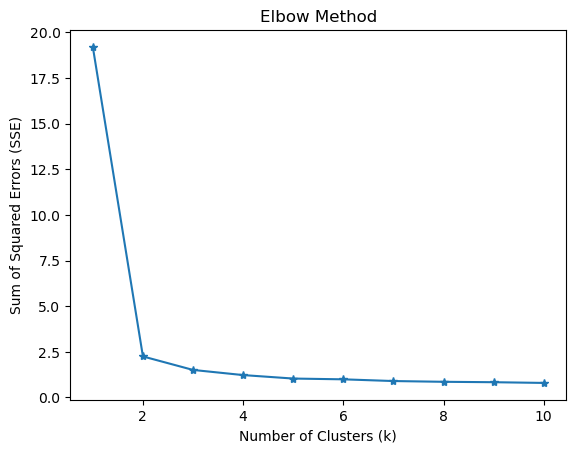

In [52]:
# Using the elbow method to find the optimized value of k
sse = {}
kmax = 10

for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(normalized_data)
    sse[k] = kmeans.inertia_

# Plot the SSE for different values of k
plt.plot(list(sse.keys()), list(sse.values()),marker='*')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

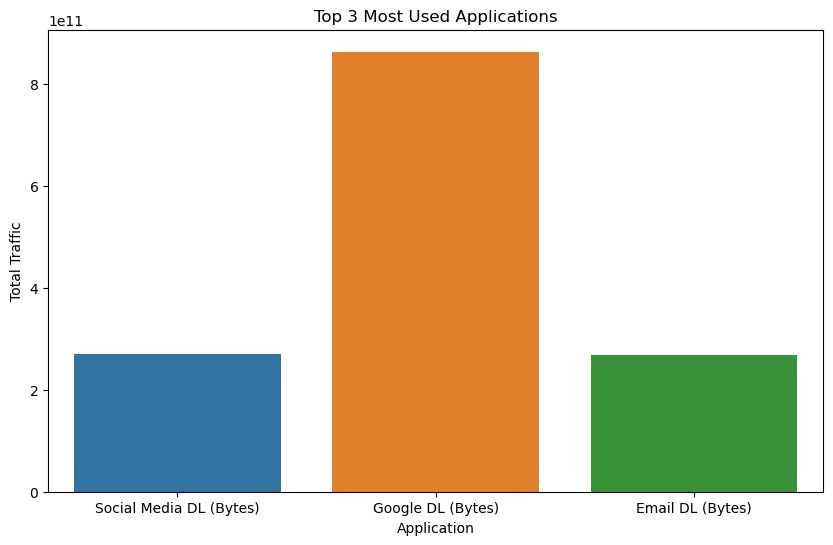

In [53]:
# Calculate the total traffic for each application
app_traffic = aggregated_data.sum().loc[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)']]

# Plot the top 3 most used applications
plt.figure(figsize=(10, 6))
sns.barplot(x=app_traffic.index, y=app_traffic.values)
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.title('Top 3 Most Used Applications')
plt.show()

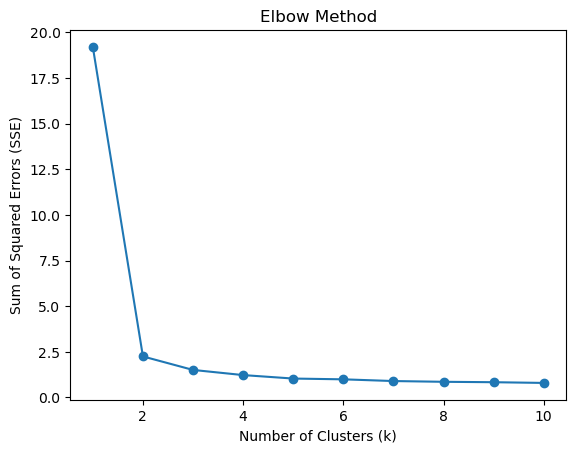

In [54]:
from sklearn.cluster import KMeans

# Define the range of k values to test
k_values = range(1, 11)

# Calculate the SSE for different values of k
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)  # Assuming you have normalized data
    sse.append(kmeans.inertia_)

# Plot the SSE values against k
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [55]:
model = KMeans(n_clusters = 3,
               max_iter = 1000)

In [56]:
m1 = aggregated_data

In [57]:
# The lowest SSE value
kmeans.inertia_

0.7977539417449447

In [58]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[1.54867185e-08, 9.46371893e-04, 1.27581905e-03, 1.40782265e-03,
        9.56246238e-04, 9.31281184e-04, 9.08550615e-04, 9.64883264e-04,
        9.25281084e-04, 9.41765750e-04, 9.49288627e-04, 9.38033709e-04,
        9.35090744e-04, 9.50434958e-04, 9.27602595e-04, 9.58429791e-04,
        9.20490094e-04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [2.22117244e-05, 1.81803337e-02, 4.48979033e-03, 4.54285495e-03,
        4.63356019e-03, 4.50547900e-03, 4.51624461e-03, 4.79831238e-03,
        4.55290962e-03, 4.59893955e-03, 4.71892547e-03, 4.63534503e-03,
        4.56855645e-03, 4.67752954e-03, 4.53867351e-03, 4.77230607e-03,
        4.47041331e-03],
       [5.90512137e-06, 5.01567200e-03, 2.51702362e-03, 2.580

In [59]:
# The number of iterations required to converge
kmeans.n_iter_

16

In [60]:
kmeans.labels_[:10]

array([0, 6, 0, 5, 4, 4, 4, 5, 3, 0])

In [61]:
cluster

2

In [62]:
from sklearn.cluster import KMeans


# Instantiate k-means algorithm
kmeans = KMeans(n_clusters=2)

# Fit the algorithm to the features
kmeans.fit(m1)

# Get the cluster labels
labels = kmeans.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [63]:
len(labels)

106857

In [64]:
centroids = np.array(cluster)
centroids

array(2)

In [65]:
# Reset the index of normalized_data
m1.reset_index(drop=True, inplace=True)

# Assign the cluster labels to the 'Class' column
m1['Class'] = labels

# Print the updated DataFrame
print(m1)

        session_frequency  session_duration  total_traffic  Gaming DL (Bytes)  \
0                     1.0      1.167201e+08   8.786906e+08       8.110911e+08   
1                     1.0      1.812310e+08   1.568596e+08       1.050353e+08   
2                     1.0      1.349694e+08   5.959665e+08       5.290685e+08   
3                     1.0      4.987802e+07   4.223207e+08       3.880748e+08   
4                     4.0      3.710445e+07   1.457411e+09       1.308981e+09   
...                   ...               ...            ...                ...   
106852                1.0      1.409887e+08   4.803073e+08       4.276202e+08   
106853          1136356.0      7.255155e+10   5.317447e+11       4.527450e+11   
106854                1.0      8.773853e+08   2.321240e+08       1.645636e+08   
106855                1.0      2.530302e+08   5.962878e+08       5.012590e+08   
106856                1.0      8.698442e+08   1.391536e+08       2.809228e+07   

        Gaming UL (Bytes)  

In [66]:
m1['Class'] = labels
m1

session_frequency  session_duration  total_traffic  Gaming DL (Bytes)  \
0                     1.0      1.167201e+08   8.786906e+08       8.110911e+08   
1                     1.0      1.812310e+08   1.568596e+08       1.050353e+08   
2                     1.0      1.349694e+08   5.959665e+08       5.290685e+08   
3                     1.0      4.987802e+07   4.223207e+08       3.880748e+08   
4                     4.0      3.710445e+07   1.457411e+09       1.308981e+09   
...                   ...               ...            ...                ...   
106852                1.0      1.409887e+08   4.803073e+08       4.276202e+08   
106853          1136356.0      7.255155e+10   5.317447e+11       4.527450e+11   
106854                1.0      8.773853e+08   2.321240e+08       1.645636e+08   
106855                1.0      2.530302e+08   5.962878e+08       5.012590e+08   
106856                1.0      8.698442e+08   1.391536e+08       2.809228e+07   

        Gaming UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0            1.367528e+06             2.206504e+06             2.563100e+04   
1            1.471478e+07             2.598548e+06             6.201700e+04   
2            9.759228e+06             3.148004e+06             4.761900e+04   
3            3.051292e+06             2.514690e+05             2.882500e+04   
4            5.816727e+06             2.861230e+06             5.131200e+04   
...                   ...                      ...                      ...   
106852       9.383076e+06             4.422140e+05             5.635500e+04   
106853       8.733066e+09             1.937715e+09             3.610230e+07   
106854       1.348513e+07             6.685960e+05             4.662800e+04   
106855       8.883653e+06             4.963370e+05             2.522900e+04   
106856       1.497798e+07             1.500145e+06             4.594300e+04   

        Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
0            3.337123e+06       1.051882e+06      8.374000e+05   
1            4.197697e+06       1.137166e+06      2.828821e+06   
2            3.343483e+06       9.964300e+04      2.436500e+06   
3            5.937765e+06       3.740728e+06      2.178618e+06   
4            1.372867e+07       4.770948e+06      2.247808e+06   
...                   ...                ...               ...   
106852       1.472406e+06       3.957299e+06      2.513433e+06   
106853       6.007942e+09       2.240634e+09      1.904048e+09   
106854       8.572779e+06       1.865881e+06      8.422790e+05   
106855       8.215537e+06       1.615080e+06      2.989663e+06   
106856       5.985089e+06       3.233558e+06      2.518425e+06   

        Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0           4.939620e+05        1.490020e+07        6.724347e+06   
1           4.789600e+05        5.324251e+06        7.107972e+06   
2           7.688800e+05        2.137272e+06        1.919630e+07   
3           1.060520e+05        4.393123e+06        2.584198e+06   
4           1.057661e+06        1.033997e+07        3.119303e+07   
...                  ...                 ...                 ...   
106852      6.640000e+02        5.596862e+06        1.425471e+07   
106853      4.958324e+08        1.249464e+10        1.184609e+10   
106854      6.784920e+05        9.839889e+06        2.120016e+06   
106855      3.289190e+05        1.669073e+07        2.004421e+07   
106856      8.125490e+05        1.898032e+07        2.196039e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Other DL (Bytes)  \
0             1.026510e+07        1.691588e+07      3.770970e+08   
1             7.705690e+05        1.045119e+07      2.795577e+08   
2             1.652592e+07        2.827981e+06      4.950865e+08   
3             1.157362e+06        7.847300e+05      2.524800e+07   
4             2.497165e+07        2.423008e+07      7.776437e+08   
...                    ...                 ...               ...   


In [67]:
# Finding the cluster centroids
centroids = kmeans.cluster_centers_

In [68]:
centroids

array([[2.59232051e+00, 1.46167917e+08, 6.90962103e+08, 5.88215753e+08,
        1.15532580e+07, 2.50208080e+06, 4.58860128e+04, 8.01649604e+06,
        2.86593838e+06, 2.49735227e+06, 6.51443543e+05, 1.62146054e+07,
        1.53437939e+07, 1.62063937e+07, 1.53319386e+07, 5.86991600e+08,
        1.15171640e+07, 1.59991016e-01],
       [1.13635600e+06, 7.25515471e+10, 5.31744709e+11, 4.52744963e+11,
        8.73306633e+09, 1.93771506e+09, 3.61023014e+07, 6.00794247e+09,
        2.24063444e+09, 1.90404805e+09, 4.95832380e+08, 1.24946355e+10,
        1.18460904e+10, 1.22889812e+10, 1.19645909e+10, 4.41928286e+11,
        9.05010670e+09, 1.00000000e+00]])

In [69]:
from sklearn.cluster import KMeans
model.fit(m1)

KMeans(max_iter=1000, n_clusters=3)

In [70]:
# Finding the cluster centroids
cluster = model.cluster_centers_
cluster

array([[ 1.43788703e+00,  1.15275389e+08,  5.32549793e+08,
         4.48381887e+08,  9.47714952e+06,  2.05372120e+06,
         3.75448755e+04,  6.56218955e+06,  2.34666795e+06,
         2.04812104e+06,  5.33701724e+05,  1.32675959e+07,
         1.25756238e+07,  1.32621267e+07,  1.25603849e+07,
         4.68416558e+08,  9.44307954e+06,  1.59582732e-02,
        -1.50941271e-18],
       [ 1.13635600e+06,  7.25515471e+10,  5.31744709e+11,
         4.52744963e+11,  8.73306633e+09,  1.93771506e+09,
         3.61023014e+07,  6.00794247e+09,  2.24063444e+09,
         1.90404805e+09,  4.95832380e+08,  1.24946355e+10,
         1.18460904e+10,  1.22889812e+10,  1.19645909e+10,
         4.41928286e+11,  9.05010670e+09,  1.00000000e+00,
         1.00000000e+00],
       [ 8.80431148e+00,  3.12400190e+08,  1.54337661e+09,
         1.34065990e+09,  2.27247698e+07,  4.91469777e+06,
         9.07695602e+04,  1.58420996e+07,  5.66012550e+06,
         4.91465944e+06,  1.28501069e+06,  3.20724236e+07,
    

In [71]:
centroids

array([[2.59232051e+00, 1.46167917e+08, 6.90962103e+08, 5.88215753e+08,
        1.15532580e+07, 2.50208080e+06, 4.58860128e+04, 8.01649604e+06,
        2.86593838e+06, 2.49735227e+06, 6.51443543e+05, 1.62146054e+07,
        1.53437939e+07, 1.62063937e+07, 1.53319386e+07, 5.86991600e+08,
        1.15171640e+07, 1.59991016e-01],
       [1.13635600e+06, 7.25515471e+10, 5.31744709e+11, 4.52744963e+11,
        8.73306633e+09, 1.93771506e+09, 3.61023014e+07, 6.00794247e+09,
        2.24063444e+09, 1.90404805e+09, 4.95832380e+08, 1.24946355e+10,
        1.18460904e+10, 1.22889812e+10, 1.19645909e+10, 4.41928286e+11,
        9.05010670e+09, 1.00000000e+00]])

In [72]:
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
len(labels)

106857

In [74]:
centroids = np.array(cluster)

In [75]:
centroids

array([[ 1.43788703e+00,  1.15275389e+08,  5.32549793e+08,
         4.48381887e+08,  9.47714952e+06,  2.05372120e+06,
         3.75448755e+04,  6.56218955e+06,  2.34666795e+06,
         2.04812104e+06,  5.33701724e+05,  1.32675959e+07,
         1.25756238e+07,  1.32621267e+07,  1.25603849e+07,
         4.68416558e+08,  9.44307954e+06,  1.59582732e-02,
        -1.50941271e-18],
       [ 1.13635600e+06,  7.25515471e+10,  5.31744709e+11,
         4.52744963e+11,  8.73306633e+09,  1.93771506e+09,
         3.61023014e+07,  6.00794247e+09,  2.24063444e+09,
         1.90404805e+09,  4.95832380e+08,  1.24946355e+10,
         1.18460904e+10,  1.22889812e+10,  1.19645909e+10,
         4.41928286e+11,  9.05010670e+09,  1.00000000e+00,
         1.00000000e+00],
       [ 8.80431148e+00,  3.12400190e+08,  1.54337661e+09,
         1.34065990e+09,  2.27247698e+07,  4.91469777e+06,
         9.07695602e+04,  1.58420996e+07,  5.66012550e+06,
         4.91465944e+06,  1.28501069e+06,  3.20724236e+07,
    

In [76]:
m1

session_frequency  session_duration  total_traffic  Gaming DL (Bytes)  \
0                     1.0      1.167201e+08   8.786906e+08       8.110911e+08   
1                     1.0      1.812310e+08   1.568596e+08       1.050353e+08   
2                     1.0      1.349694e+08   5.959665e+08       5.290685e+08   
3                     1.0      4.987802e+07   4.223207e+08       3.880748e+08   
4                     4.0      3.710445e+07   1.457411e+09       1.308981e+09   
...                   ...               ...            ...                ...   
106852                1.0      1.409887e+08   4.803073e+08       4.276202e+08   
106853          1136356.0      7.255155e+10   5.317447e+11       4.527450e+11   
106854                1.0      8.773853e+08   2.321240e+08       1.645636e+08   
106855                1.0      2.530302e+08   5.962878e+08       5.012590e+08   
106856                1.0      8.698442e+08   1.391536e+08       2.809228e+07   

        Gaming UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0            1.367528e+06             2.206504e+06             2.563100e+04   
1            1.471478e+07             2.598548e+06             6.201700e+04   
2            9.759228e+06             3.148004e+06             4.761900e+04   
3            3.051292e+06             2.514690e+05             2.882500e+04   
4            5.816727e+06             2.861230e+06             5.131200e+04   
...                   ...                      ...                      ...   
106852       9.383076e+06             4.422140e+05             5.635500e+04   
106853       8.733066e+09             1.937715e+09             3.610230e+07   
106854       1.348513e+07             6.685960e+05             4.662800e+04   
106855       8.883653e+06             4.963370e+05             2.522900e+04   
106856       1.497798e+07             1.500145e+06             4.594300e+04   

        Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
0            3.337123e+06       1.051882e+06      8.374000e+05   
1            4.197697e+06       1.137166e+06      2.828821e+06   
2            3.343483e+06       9.964300e+04      2.436500e+06   
3            5.937765e+06       3.740728e+06      2.178618e+06   
4            1.372867e+07       4.770948e+06      2.247808e+06   
...                   ...                ...               ...   
106852       1.472406e+06       3.957299e+06      2.513433e+06   
106853       6.007942e+09       2.240634e+09      1.904048e+09   
106854       8.572779e+06       1.865881e+06      8.422790e+05   
106855       8.215537e+06       1.615080e+06      2.989663e+06   
106856       5.985089e+06       3.233558e+06      2.518425e+06   

        Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0           4.939620e+05        1.490020e+07        6.724347e+06   
1           4.789600e+05        5.324251e+06        7.107972e+06   
2           7.688800e+05        2.137272e+06        1.919630e+07   
3           1.060520e+05        4.393123e+06        2.584198e+06   
4           1.057661e+06        1.033997e+07        3.119303e+07   
...                  ...                 ...                 ...   
106852      6.640000e+02        5.596862e+06        1.425471e+07   
106853      4.958324e+08        1.249464e+10        1.184609e+10   
106854      6.784920e+05        9.839889e+06        2.120016e+06   
106855      3.289190e+05        1.669073e+07        2.004421e+07   
106856      8.125490e+05        1.898032e+07        2.196039e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Other DL (Bytes)  \
0             1.026510e+07        1.691588e+07      3.770970e+08   
1             7.705690e+05        1.045119e+07      2.795577e+08   
2             1.652592e+07        2.827981e+06      4.950865e+08   
3             1.157362e+06        7.847300e+05      2.524800e+07   
4             2.497165e+07        2.423008e+07      7.776437e+08   
...                    ...                 ...               ...   


In [77]:
centroids[:,0]

array([1.43788703e+00, 1.13635600e+06, 8.80431148e+00])

In [78]:
centroids[:,1]

array([1.15275389e+08, 7.25515471e+10, 3.12400190e+08])

In [79]:
centroids[:,2]

array([5.32549793e+08, 5.31744709e+11, 1.54337661e+09])

## Plot the top 3 most used applications using appropriate charts.  
## Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
## What is the optimized value of k (use the elbow method for this)?  
## Interpret your findings. 


In [80]:
m1.columns

Index(['session_frequency', 'session_duration', 'total_traffic',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Other DL (Bytes)', 'Other UL (Bytes)', 'Cluster', 'Class'],
      dtype='object')

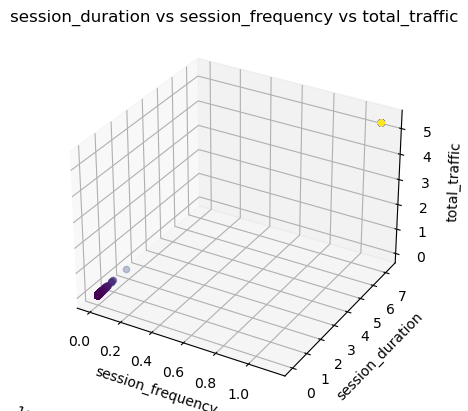

In [81]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
aggregated_data['Class'] = labels
m1['Class'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(m1['session_frequency'])
y = np.array(m1['session_duration'])
z = np.array(m1['total_traffic'])

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='b')
ax.scatter(x, y, z, c=y)

plt.title('session_duration vs session_frequency vs total_traffic')
ax.set_xlabel('session_frequency')
ax.set_ylabel('session_duration')
ax.set_zlabel('total_traffic')
plt.show()

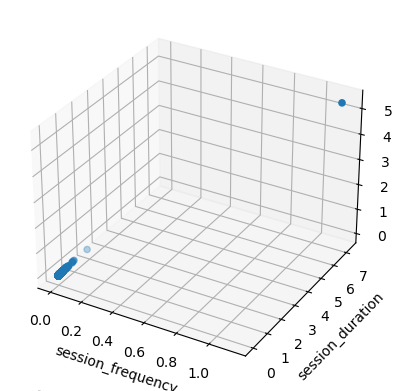

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =m1['session_frequency']
y =m1['session_duration']
z =m1['total_traffic']

ax.scatter(x, y, z)
ax.set_xlabel('session_frequency')
ax.set_ylabel('session_duration')
ax.set_zlabel('total_traffic')

plt.show()

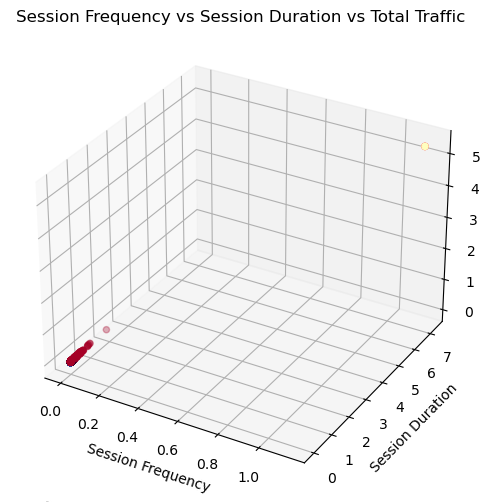

In [83]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Assuming you have the aggregated_data DataFrame

model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
m1['Class'] = labels

x = np.array(m1['session_frequency'])
y = np.array(m1['session_duration'])
z = np.array(m1['total_traffic'])
colors = labels

fig = plt.figure(figsize=[15, 6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='r')
ax.scatter(x, y, z, c=colors, cmap='RdYlBu_r')
ax.set_xlabel('Session Frequency')
ax.set_ylabel('Session Duration')
ax.set_zlabel('Total Traffic')
plt.title('Session Frequency vs Session Duration vs Total Traffic')
plt.show()

In [84]:
m1['Class']

0         0
1         0
2         0
3         0
4         2
         ..
106852    0
106853    1
106854    0
106855    0
106856    0
Name: Class, Length: 106857, dtype: int32

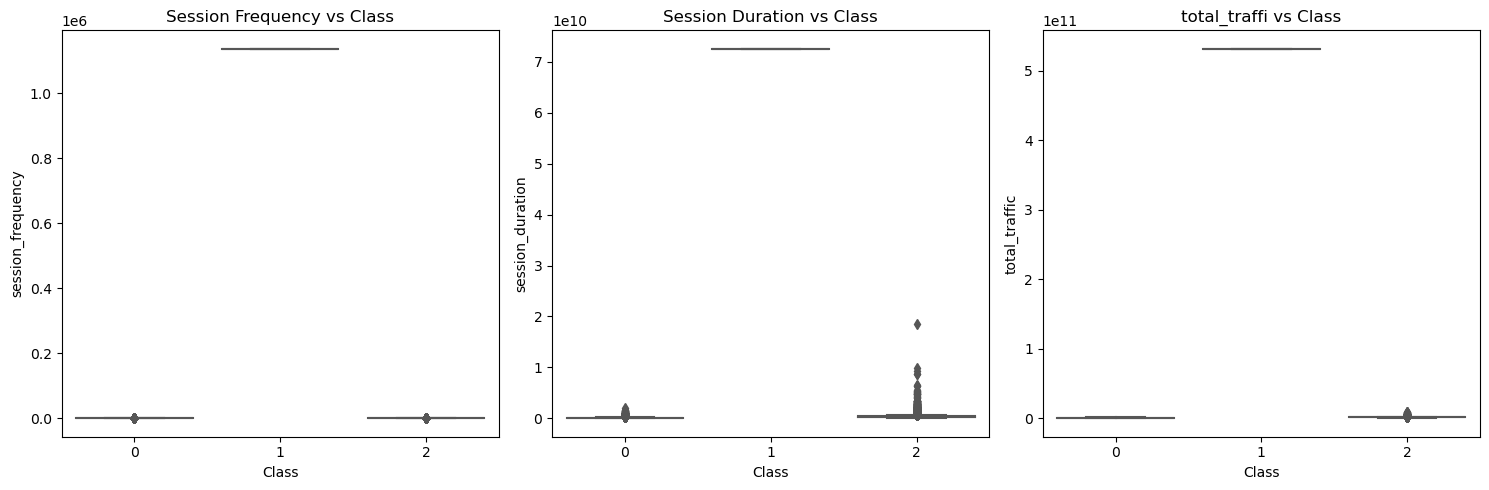

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Class', y='session_frequency', data=m1, color='#FF781F')
plt.title('Session Frequency vs Class')

plt.subplot(1, 3, 2)
sns.boxplot(x='Class', y='session_duration', data=m1, color='#FF781F')
plt.title('Session Duration vs Class')

plt.subplot(1, 3, 3)
sns.boxplot(x='Class', y='total_traffic', data=m1, color='#FF781F')
plt.title('total_traffi vs Class')

plt.tight_layout()
plt.show()

 ## "Class 0" represent a group of high-engagement customers, "Class 1" crepresent medium-engagement customers, and "Class 2" represent low-engagement customers. 
    
    
### this code generates a visual representation of the distribution of the variables 'session_frequency', 'session_duration', and 'total_traffic' grouped by the 'Class' variable. It allows for easy comparison and analysis of the distributions across different classes.

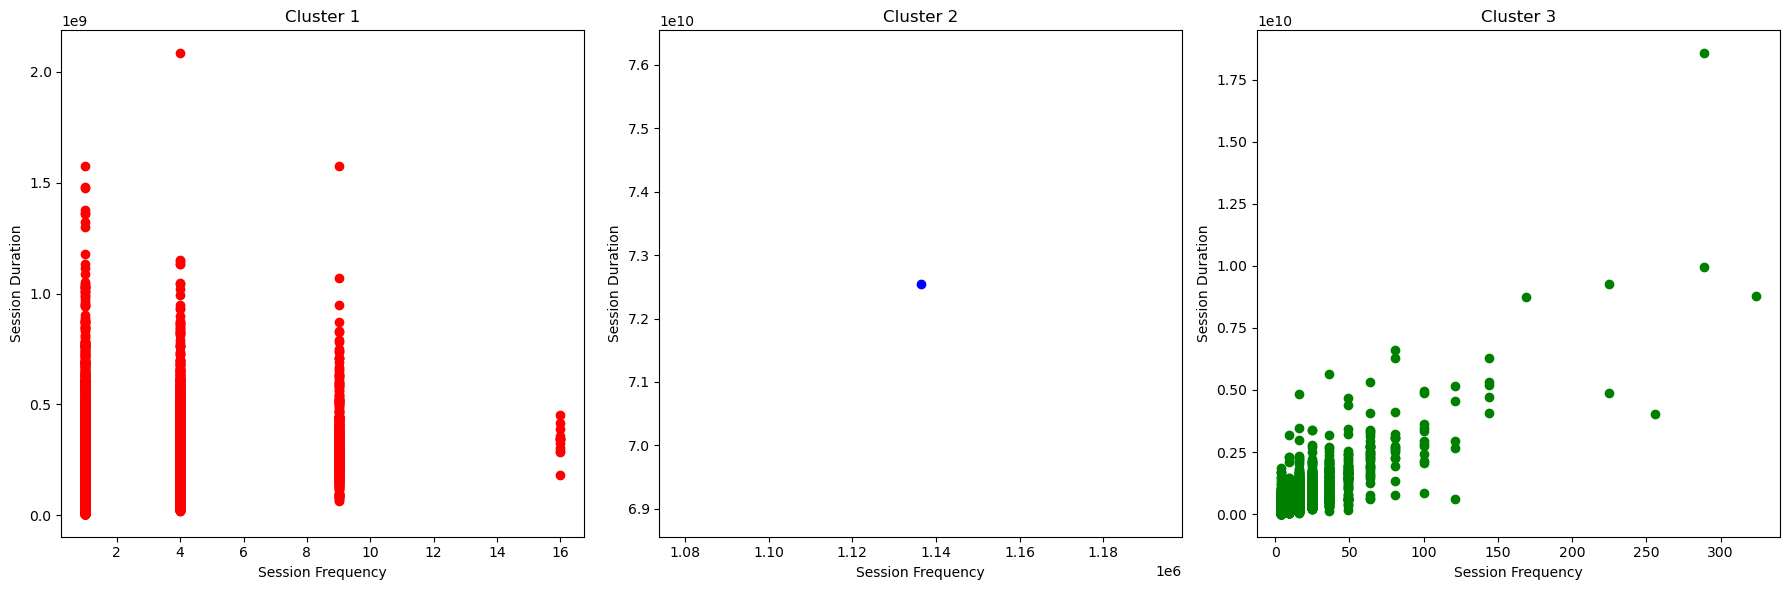

In [87]:
# Filter data for each cluster
cluster1_data = m1[m1['Class'] == 0]
cluster2_data = m1[m1['Class'] == 1]
cluster3_data = m1[m1['Class'] == 2]

# Create separate plots for each cluster
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Cluster 1
ax[0].scatter(cluster1_data['session_frequency'], cluster1_data['session_duration'], color='red')
ax[0].set_xlabel('Session Frequency')
ax[0].set_ylabel('Session Duration')
ax[0].set_title('Cluster 1')

# Plot for Cluster 2
ax[1].scatter(cluster2_data['session_frequency'], cluster2_data['session_duration'], color='blue')
ax[1].set_xlabel('Session Frequency')
ax[1].set_ylabel('Session Duration')
ax[1].set_title('Cluster 2')

# Plot for Cluster 3
ax[2].scatter(cluster3_data['session_frequency'], cluster3_data['session_duration'], color='green')
ax[2].set_xlabel('Session Frequency')
ax[2].set_ylabel('Session Duration')
ax[2].set_title('Cluster 3')

plt.tight_layout()
plt.show()

cluster1_data = m1[m1['Class'] == 0] creates a dataframe cluster1_data by selecting rows from m1 where the value in the "Class" column is 0. This corresponds to data points belonging to cluster 1.

cluster2_data = m1[m1['Class'] == 1] creates a dataframe cluster2_data by selecting rows from m1 where the value in the "Class" column is 1. This corresponds to data points belonging to cluster 2.

cluster3_data = m1[m1['Class'] == 2] creates a dataframe cluster3_data by selecting rows from m1 where the value in the "Class" column is 2. This corresponds to data points belonging to cluster 3.


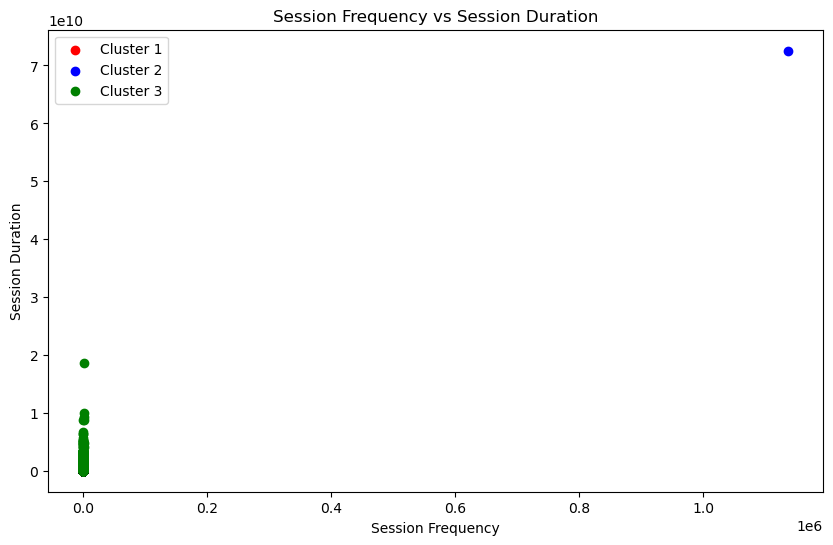

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points for each cluster
ax.scatter(cluster1_data['session_frequency'], cluster1_data['session_duration'], color='red', label='Cluster 1')
ax.scatter(cluster2_data['session_frequency'], cluster2_data['session_duration'], color='blue', label='Cluster 2')
ax.scatter(cluster3_data['session_frequency'], cluster3_data['session_duration'], color='green', label='Cluster 3')

ax.set_xlabel('Session Frequency')
ax.set_ylabel('Session Duration')
ax.set_title('Session Frequency vs Session Duration')
ax.legend()

plt.show()